In [1]:
#Library Pengolahan Data
import numpy as np
import pandas as pd

#Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library Scaling dan Encoding 
from sklearn.preprocessing import RobustScaler

#Library Handling Outlier
from feature_engine.outliers import Winsorizer

#Library Evaluasi
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Library KMeans
from sklearn.cluster import KMeans

#Library PCA
from sklearn.decomposition import PCA

#Library Saving Model
import pickle 
import json

In [2]:
#Import data syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('h8dsft_P1G4_evan_derin_ihsanudin.csv')

In [3]:
#Menampilkan 10 data teratas
pd.set_option('display.max_columns', 500) 
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
#Menampilkan 10 data terakhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
#Pengecekan null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [7]:
#Copy dataset ke variabel df_eda
df_eda = df.copy()

In [8]:
# Memisahkan kolom numerical dan categorical
df_cat_id = ['CUST_ID']
df_num_columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
df_num_scal_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

#Print kolom num dan cat
print('Num Columns : ', df_num_columns)
print('Num Columns (Already Scaling) : ', df_num_scal_columns)

Num Columns :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Num Columns (Already Scaling) :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


In [9]:
#Mengecek statistik dasar dengan syntax .describe
df[df_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
CASH_ADVANCE_TRX,4475.0,3.301229,7.134727,0.000000,0.000000,0.000000,4.000000,123.00000
PURCHASES_TRX,4475.0,14.929162,25.540814,0.000000,1.000000,7.000000,17.000000,347.00000
CREDIT_LIMIT,4475.0,4494.878630,3609.267706,50.000000,1600.000000,3000.000000,6500.000000,30000.00000
PAYMENTS,4475.0,1740.075430,2827.633858,0.000000,376.913051,877.494612,1911.596530,50721.48336
MINIMUM_PAYMENTS,4320.0,873.976757,2436.877272,0.019163,168.590144,313.980229,819.371080,76406.20752


C:\Users\USER\AppData\Local\Temp\ipykernel_37340\3646153653.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, col) in enumerate(df[df_num_columns].iteritems()):


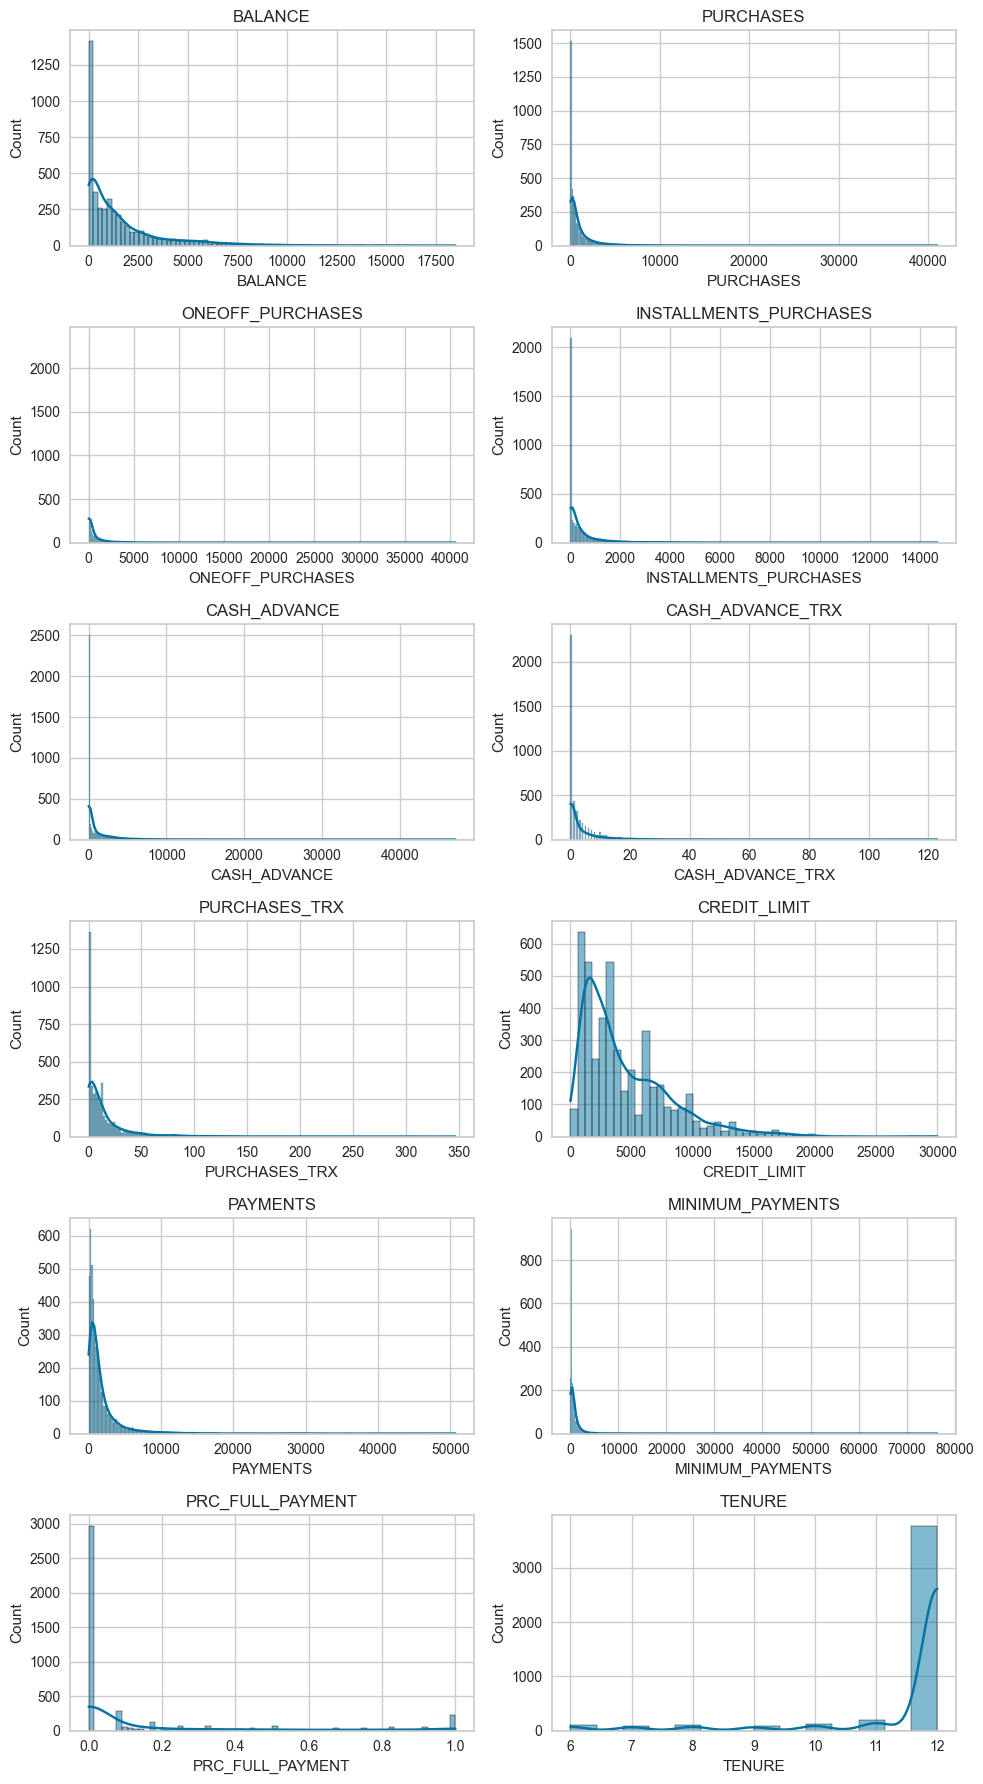

In [10]:
#Membuat plot distribusi feature numeric
k = len(df_num_columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[df_num_columns].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.histplot(col,kde=True,ax=ax)
    ax.set_title(name)
fig.tight_layout()

Dari informasi diatas dapat disimpulkan bahwa :

- *Customer* memiliki *balance* rata-rata **2.072** dengan *range* **0-18.495**. *Balance customer* tidak terdistribusi merata (cenderung dibawah 2000) 
- *Customer* memiliki rata-rata total pembelian **1.003** dengan range **0-41.050**. Total pembelian dari setiap akun tidak terdistribusi merata (cenderung dibawah **1.102**)
- *Customer* yang melakukan pembelian dalam 1x pembayaran memiliki rata-rata maximum *value* **596** dengan *range* **0-40.624**. Maksimum *Value* pembelian dalam 1x terdistribusi tidak merata  (cenderung dibawah **575**)
- Cicilan *customer* memiliki rata-rata 407 dengan *range*  **0-14.686**. Cicilan *customer* tidak terdistribusi merata (cenderung dibawah **455**)
- *Cash Advanced* yang dilakukan *customer* memiliki rata-rata **984** dengan range **0-47.137**. *Cash advanced* yang dilakukan *customer* tidak merata (cenderung dibawah **1.138**)
- Jumlah transaksi dengan metode *cash advanced* pada setiap akun memiliki rata-rata **3** dengan *range* **0-123**. Jumlah transaksi metode *cash advanced* pada setiap akun tidak merata (cenderung dibawah **4** transaksi)
- Jumlah transaksi pada setiap akun memiliki rata-rata **14** dengan *range* **0-347**. Jumlah transaksi pada setiap akun tidak merata (cenderung dibawah 17 transaksi)
- *Customer* memiliki *limit credit* rata-rata **4.494** dengan *range* **50-30.000**. *Limit credit customer* tidak merata (cenderung dibawah **4.000**)
- Total *payment customer* memiliki  rata-rata **1.740** dengan *range* **0-50.721**. Total *payment customer* tidak merata (cenderung dibawah **800**)
- Minimum *payment customer* memiliki  rata-rata **874** dengan *range* **0-76.406**. Minimum *payment customer* tidak merata (cenderung dibawah **800**)
- Persentase  *full payment customer* memiliki  rata-rata **0.1** dengan *range* **0-1**. Persentase  *full payment customer* tidak merata (cenderung dibawah **0.12**)
- *Tenure customer* memiliki  rata-rata **11.5** dengan *range* **6-12**. *Tenure* tidak merata (terpisat pada **12**)

<AxesSubplot: >

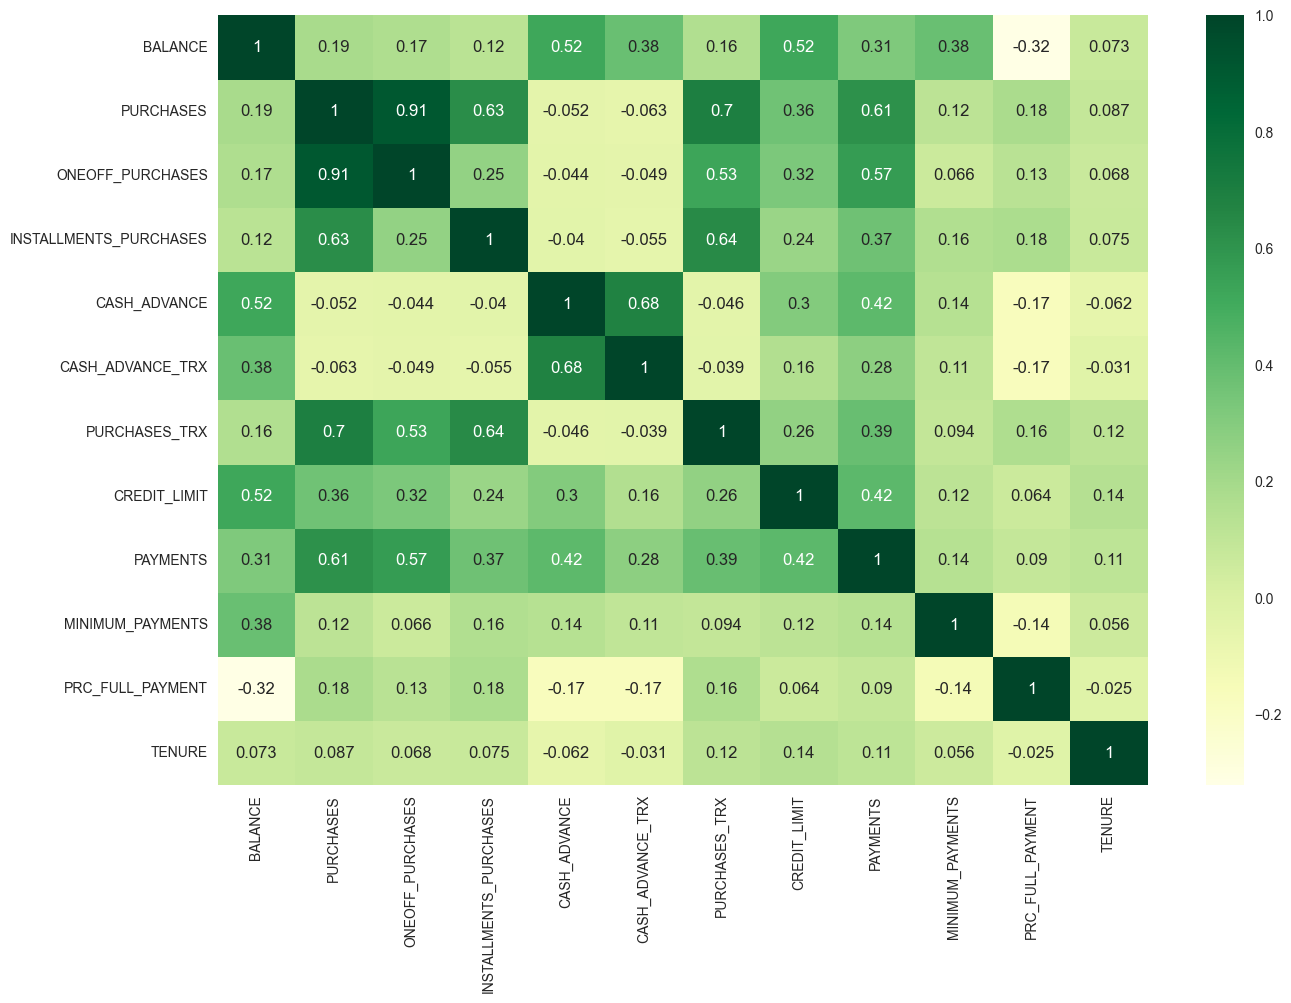

In [11]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [15,10]
sns.heatmap(df_eda[df_num_columns].corr(), annot = True, color = 'blue', cmap = 'YlGn')

In [12]:
#Pembuatan dataframe korelasi
corr = df_eda.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
corr_triu = corr_triu.stack()

In [13]:
#Rename kolom agar lebih rapi
corr_triu.name = 'Pearson_Correlation_Coefficient'
corr_triu.index.names = ['Feature_1', 'Feature_2']

In [14]:
#Filter dataframe
corr_filter = corr_triu[(corr_triu >= 0.5) | (corr_triu <= -0.5)].to_frame()
corr_filter.reset_index(inplace=True)

In [15]:
#Pembuatan Label
conditions = [
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.3) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.5),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.5) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.7),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.7) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.9),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.9) & (corr_filter['Pearson_Correlation_Coefficient'] <= 1),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.3) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.5),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.5) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.7),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.7) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.9),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.9) & (corr_filter['Pearson_Correlation_Coefficient'] >= -1),
    ]
values = ['Low_Positive_Correlation','Moderate_Positive_Correlation','High_Positive_Correlation','Very_High_Positive_Correlation',\
    'Low_Negative_Correlation','Moderate_Negative_Correlation','High_Negative_Correlation','Very_High_Negative_Correlation']

corr_filter['label'] = np.select(conditions,values)

In [16]:
#Menampilkan df korelasi
corr_filter

,Feature_1,Feature_2,Pearson_Correlation_Coefficient,label
0,BALANCE,CASH_ADVANCE,0.520446,Moderate_Positive_Correlation
1,BALANCE,CREDIT_LIMIT,0.524961,Moderate_Positive_Correlation
2,PURCHASES,ONEOFF_PURCHASES,0.910604,Very_High_Positive_Correlation
3,PURCHASES,INSTALLMENTS_PURCHASES,0.629758,Moderate_Positive_Correlation
4,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,0.505073,Moderate_Positive_Correlation
5,PURCHASES,PURCHASES_TRX,0.697422,Moderate_Positive_Correlation
6,PURCHASES,PAYMENTS,0.614773,Moderate_Positive_Correlation
7,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,0.523013,Moderate_Positive_Correlation
8,ONEOFF_PURCHASES,PURCHASES_TRX,0.526970,Moderate_Positive_Correlation
9,ONEOFF_PURCHASES,PAYMENTS,0.569453,Moderate_Positive_Correlation


In [17]:
#Membuat treshold balance frequency
df_eda['treshold_BALANCE_FREQUENCY'] = np.where(df_eda['BALANCE_FREQUENCY'] <=0.5, 'Tidak Sering', 'Sering')

In [18]:
#Print jumlah customer sesuai treshold
df_eda['treshold_BALANCE_FREQUENCY'].value_counts()

Sering          3994
Tidak Sering     481
Name: treshold_BALANCE_FREQUENCY, dtype: int64

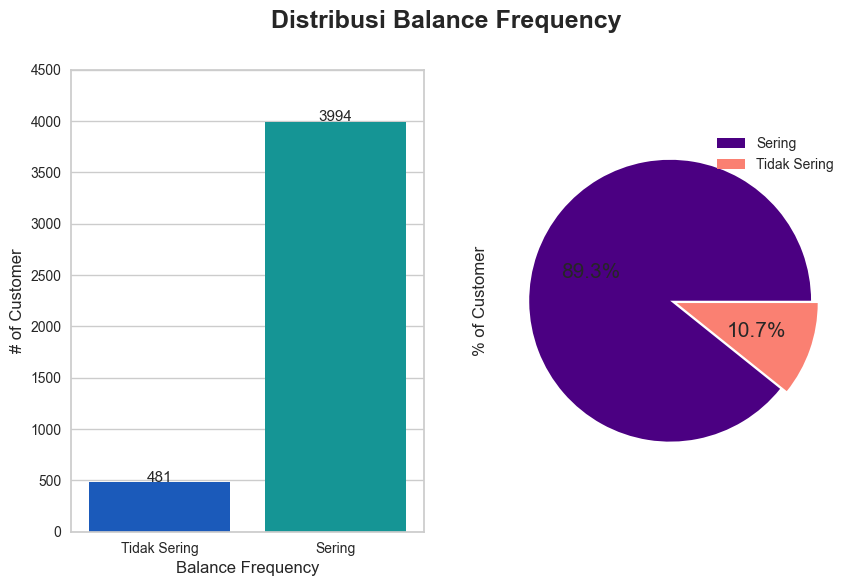

In [19]:
# Membuat visualisasi distribusi balance frequency
fig, ax =plt.subplots(1,2,figsize=(10,6))

sns.countplot(x='treshold_BALANCE_FREQUENCY', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Balance Frequency", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Distribusi Balance Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+48), ha='center', va='center',fontsize = 11) 

df_eda['treshold_BALANCE_FREQUENCY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.legend(labels=['Sering', 'Tidak Sering'])
plt.show()

Dari visualisasi dan informasi diatas dapat disimpulkan bahwa :

1. Lebih banyak *customer* yang sering meng-update *balance* nya

In [20]:
#Membuat treshold PURCHASES_FREQUENCY
df_eda['treshold_PURCHASES_FREQUENCY'] = np.where(df_eda['PURCHASES_FREQUENCY'] <=0.5, 'Tidak Sering', 'Sering')

In [21]:
#Print jumlah customer sesuai treshold
df_eda['treshold_PURCHASES_FREQUENCY'].value_counts()

Tidak Sering    2391
Sering          2084
Name: treshold_PURCHASES_FREQUENCY, dtype: int64

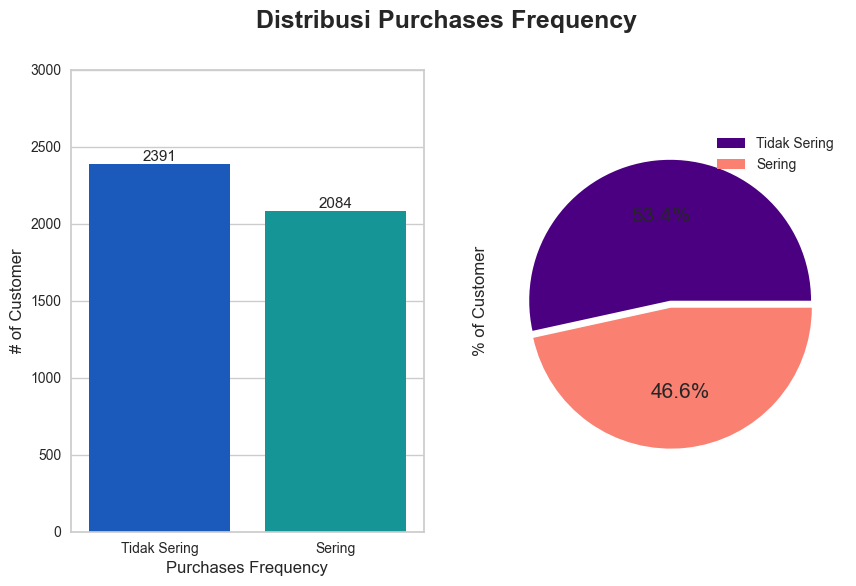

In [22]:
# Membuat visualisasi distribusi Purchases Frequency
fig, ax =plt.subplots(1,2,figsize=(10,6))

sns.countplot(x='treshold_PURCHASES_FREQUENCY', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Purchases Frequency", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Distribusi Purchases Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,3000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 

df_eda['treshold_PURCHASES_FREQUENCY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.legend(labels=['Tidak Sering', 'Sering'])
plt.show()

Dari visualisasi dan informasi diatas dapat disimpulkan bahwa :

1. Lebih banyak *customer* yang tidak sering melakukan pembelian

In [23]:
#Membuat treshold ONEOFF_PURCHASES_FREQUENCY
df_eda['treshold_ONEOFF_PURCHASES_FREQUENCY'] = np.where(df_eda['ONEOFF_PURCHASES_FREQUENCY'] <=0.5, 'Tidak Sering', 'Sering')

In [24]:
#Print jumlah customer sesuai treshold
df_eda['treshold_ONEOFF_PURCHASES_FREQUENCY'].value_counts()

Tidak Sering    3804
Sering           671
Name: treshold_ONEOFF_PURCHASES_FREQUENCY, dtype: int64

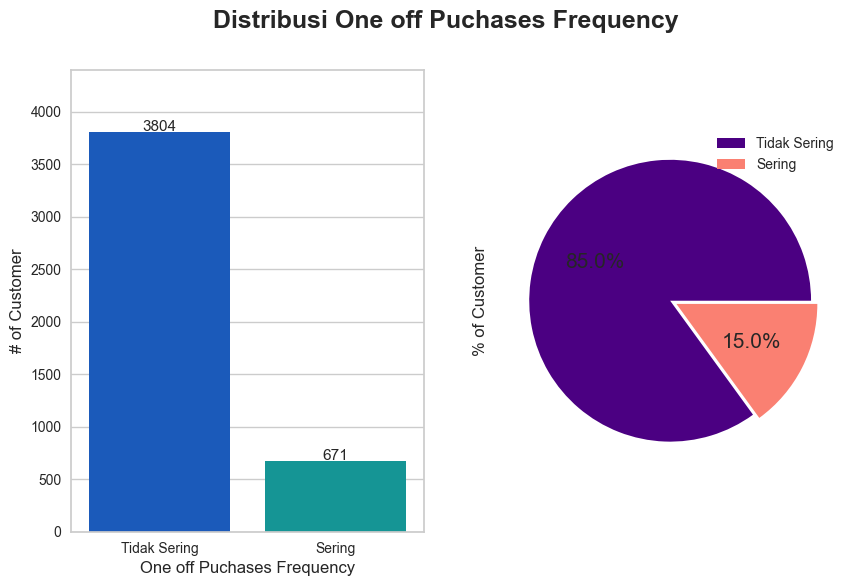

In [25]:
# Membuat visualisasi distribusi ONEOFF_PURCHASES_FREQUENCY
fig, ax =plt.subplots(1,2,figsize=(10,6))

sns.countplot(x='treshold_ONEOFF_PURCHASES_FREQUENCY', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("One off Puchases Frequency", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Distribusi One off Puchases Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4400)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['treshold_ONEOFF_PURCHASES_FREQUENCY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.legend(labels=['Tidak Sering', 'Sering'])
plt.show()

Dari visualisasi dan informasi diatas dapat disimpulkan bahwa :

1. Lebih banyak *customer* yang tidak sering melakukan pembelian dalam 1x transaksi

In [26]:
#Membuat treshold PURCHASES_INSTALLMENTS_FREQUENCY
df_eda['treshold_PURCHASES_INSTALLMENTS_FREQUENCY'] = np.where(df_eda['PURCHASES_INSTALLMENTS_FREQUENCY'] <=0.5, 'Tidak Sering', 'Sering')

In [27]:
#Print jumlah customer sesuai treshold
df_eda['treshold_PURCHASES_INSTALLMENTS_FREQUENCY'].value_counts()

Tidak Sering    2929
Sering          1546
Name: treshold_PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

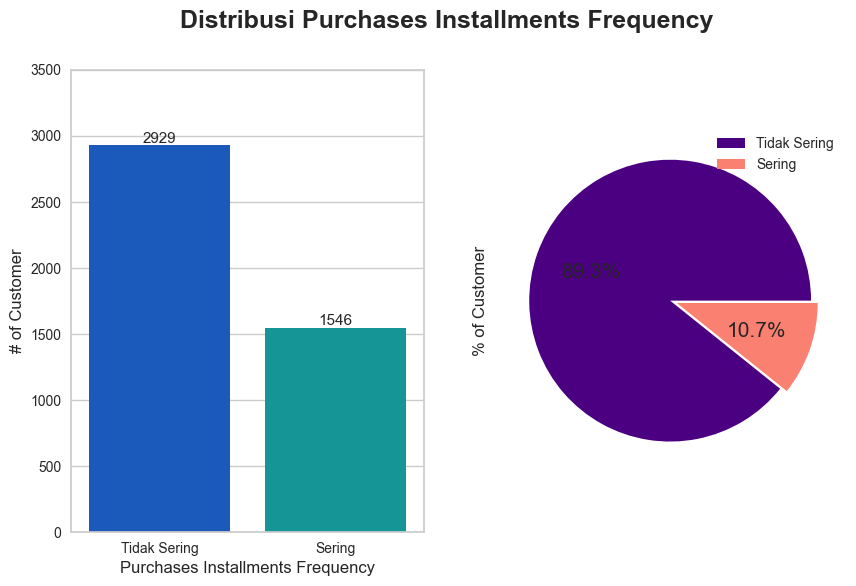

In [28]:
# Membuat visualisasi distribusi PURCHASES_INSTALLMENTS_FREQUENCY
fig, ax =plt.subplots(1,2,figsize=(10,6))

sns.countplot(x='treshold_PURCHASES_INSTALLMENTS_FREQUENCY', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Purchases Installments Frequency", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Distribusi Purchases Installments Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,3500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['treshold_BALANCE_FREQUENCY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.legend(labels=['Tidak Sering', 'Sering'])
plt.show()

Dari visualisasi dan informasi diatas dapat disimpulkan bahwa :

1. Lebih banyak *customer* yang tidak sering menglakukan cicilan

In [29]:
#Membuat treshold CASH_ADVANCE_FREQUENCY
df_eda['treshold_CASH_ADVANCE_FREQUENCY'] = np.where(df_eda['CASH_ADVANCE_FREQUENCY'] <=0.5, 'Tidak Sering', 'Sering')

In [30]:
#Print jumlah customer sesuai treshold
df_eda['treshold_CASH_ADVANCE_FREQUENCY'].value_counts()

Tidak Sering    4204
Sering           271
Name: treshold_CASH_ADVANCE_FREQUENCY, dtype: int64

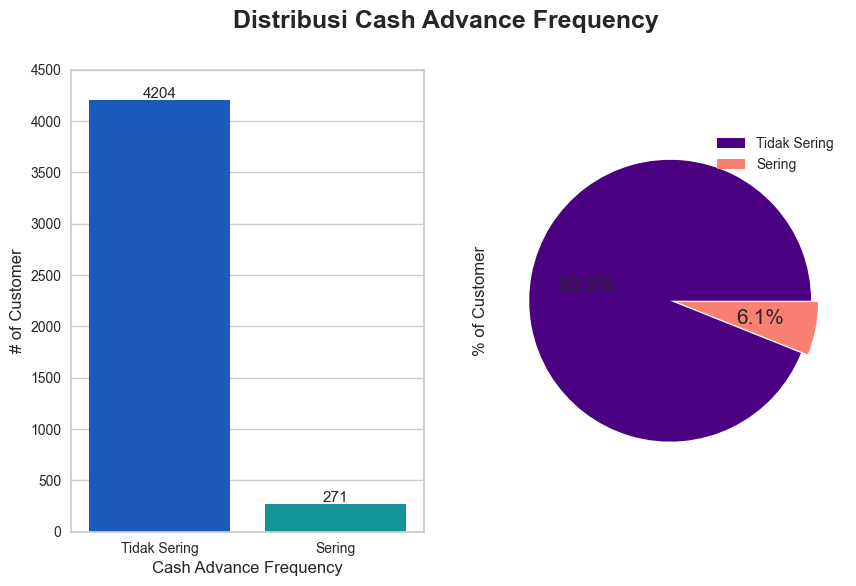

In [31]:
# Membuat visualisasi distribusi CASH_ADVANCE_FREQUENCY
fig, ax =plt.subplots(1,2,figsize=(10,6))

sns.countplot(x='treshold_CASH_ADVANCE_FREQUENCY', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Cash Advance Frequency", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Distribusi Cash Advance Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+60), ha='center', va='center',fontsize = 11) 

df_eda['treshold_CASH_ADVANCE_FREQUENCY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.legend(labels=['Tidak Sering', 'Sering'])
plt.show()

Dari visualisasi dan informasi diatas dapat disimpulkan bahwa :

1. Lebih banyak *customer* yang tidak sering melakukan pembelian dengan metode *cash advance*

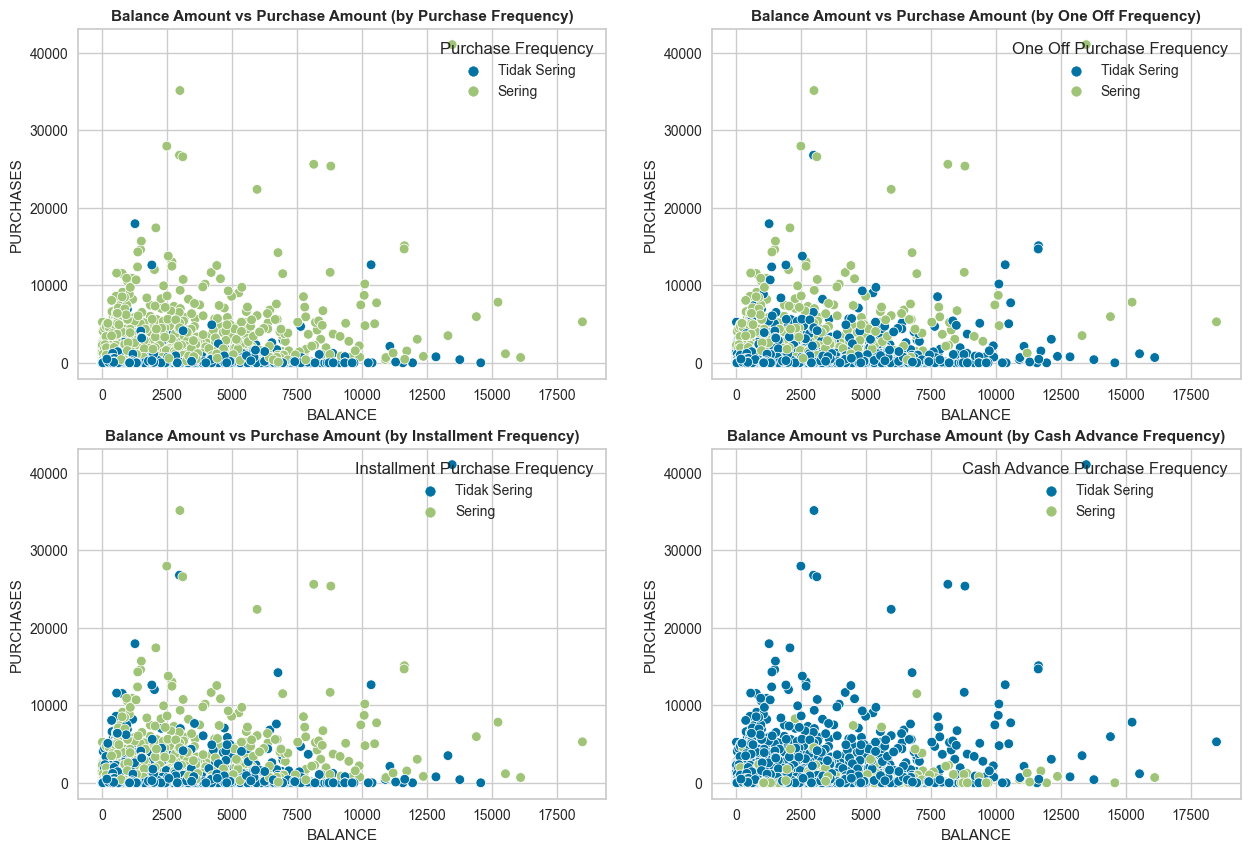

In [32]:
#Visualisasi Balance Amount VS Purchase Amount berdasarkan purchase frequency, oneoff frequency, installments frequency dan cash advance frequency
fig, ax =plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x="BALANCE", y="PURCHASES", hue="treshold_PURCHASES_FREQUENCY", data=df_eda, ax=ax[0,0])
ax[0,0].set_title('Balance Amount vs Purchase Amount (by Purchase Frequency)', fontsize=11, fontweight='bold')
ax[0,0].legend(title='Purchase Frequency', loc='upper right')

sns.scatterplot(x="BALANCE", y="PURCHASES", hue="treshold_ONEOFF_PURCHASES_FREQUENCY", data=df_eda, ax=ax[0,1])
ax[0,1].set_title('Balance Amount vs Purchase Amount (by One Off Frequency)', fontsize=11, fontweight='bold')
ax[0,1].legend(title='One Off Purchase Frequency', loc='upper right')

sns.scatterplot(x="BALANCE", y="PURCHASES", hue="treshold_PURCHASES_INSTALLMENTS_FREQUENCY", data=df_eda, ax=ax[1,0])
ax[1,0].set_title('Balance Amount vs Purchase Amount (by Installment Frequency)', fontsize=11, fontweight='bold')
ax[1,0].legend(title='Installment Purchase Frequency', loc='upper right')

sns.scatterplot(x="BALANCE", y="PURCHASES", hue="treshold_CASH_ADVANCE_FREQUENCY", data=df_eda, ax=ax[1,1])
ax[1,1].set_title('Balance Amount vs Purchase Amount (by Cash Advance Frequency)', fontsize=11, fontweight='bold')
ax[1,1].legend(title='Cash Advance Purchase Frequency', loc='upper right')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa :

- *Customer* yang memiliki *balance* tinggi (>15.000)  dan *amount purchase* yang rendah (<10.000) cenderung sering melakukan pembelian dengan metode *Installment Purchase*
- *Customer* yang memiliki *balance* kecil-menengah (<7.500)  dan *amount purchase* yang tinggi (>20.000) cenderung sering melakukan pembelian dengan metode *One Off Purchases* dan metode *Installment Purchase*. Selain itu *customer* pada kelas ini, tidak sering melakukan pembelian dengan metode *Cash Advance*
- *Customer* banyak yang memiliki *balance* <10.000 dan *purchases* <10.000 (terpusat)
- Metode pembelian *Cash Advance* tidak sering digunakan *customer*

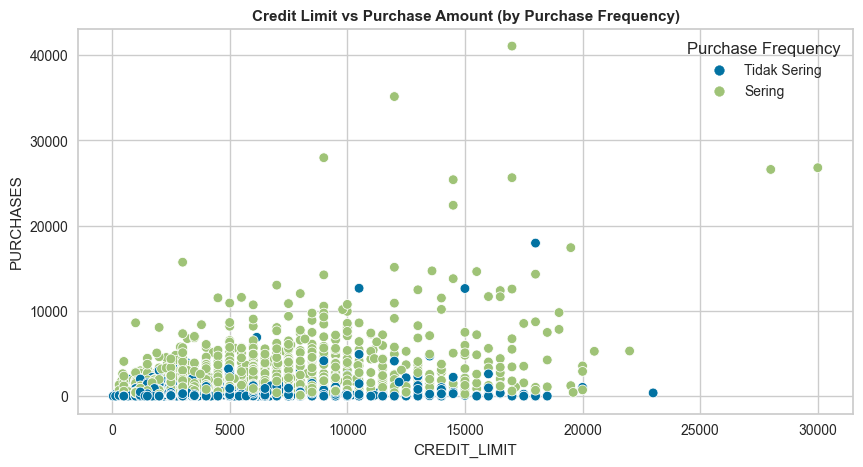

In [33]:
#Visualisasi Credit Limit VS Purchase Amount berdasarkan purchase frequency, oneoff frequency, installments frequency dan cash advance frequency
plt.figure(figsize=(10,5))
sns.scatterplot(x="CREDIT_LIMIT", y="PURCHASES", hue="treshold_PURCHASES_FREQUENCY", data=df_eda)
plt.title('Credit Limit vs Purchase Amount (by Purchase Frequency)', fontsize=11, fontweight='bold')
plt.legend(title='Purchase Frequency', loc='upper right')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa :

- *Customer* banyak yang memiliki *credit limit* <20.000 dan *purchases* <10.000 (terpusat)

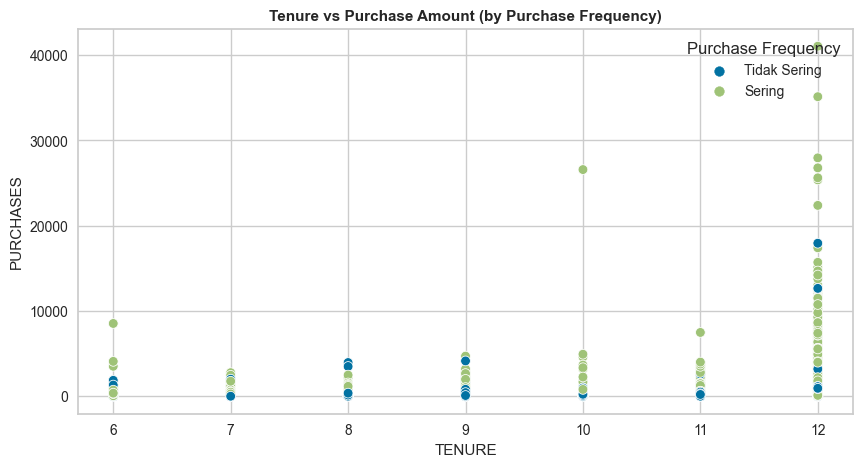

In [34]:
#Visualisasi Tenure VS Purchase Amount berdasarkan purchase frequency, oneoff frequency, installments frequency dan cash advance frequency
plt.figure(figsize=(10,5))
sns.scatterplot(x="TENURE", y="PURCHASES", hue="treshold_PURCHASES_FREQUENCY", data=df_eda)
plt.title('Tenure vs Purchase Amount (by Purchase Frequency)', fontsize=11, fontweight='bold')
plt.legend(title='Purchase Frequency', loc='upper right')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa :

- *Customer* banyak yang memiliki *tenure* 12 (terpusat)
- Pembelian pada *tenure* 12 kebawah cenderung dibawah 20.000

In [35]:
#Drop cust_id
df.drop(columns='CUST_ID',inplace=True)

In [36]:
#Mencoba tampilkan df
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [37]:
#Pengecekan null values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [38]:
#Definisi fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

    #Cek skew feature
    print('\nSkewness Value ',variable, ' : ' , df[variable].skew())

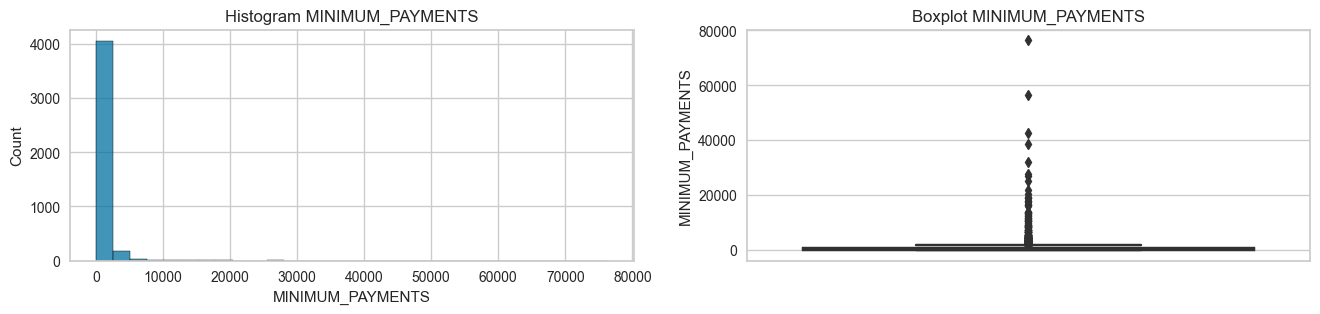


Skewness Value  MINIMUM_PAYMENTS  :  14.669771084332645


In [39]:
#Pengecekan distribusi
diagnostic_plots(df,'MINIMUM_PAYMENTS')

In [40]:
#Isi null values dengan median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [41]:
#Cek null values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dari informasi diatas dapat disimpulkan bahwa sudah tidak ada *missing values* pada dataset

In [42]:
#Pembuatan list kolom
list_columns = df.columns.to_list()
list_columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

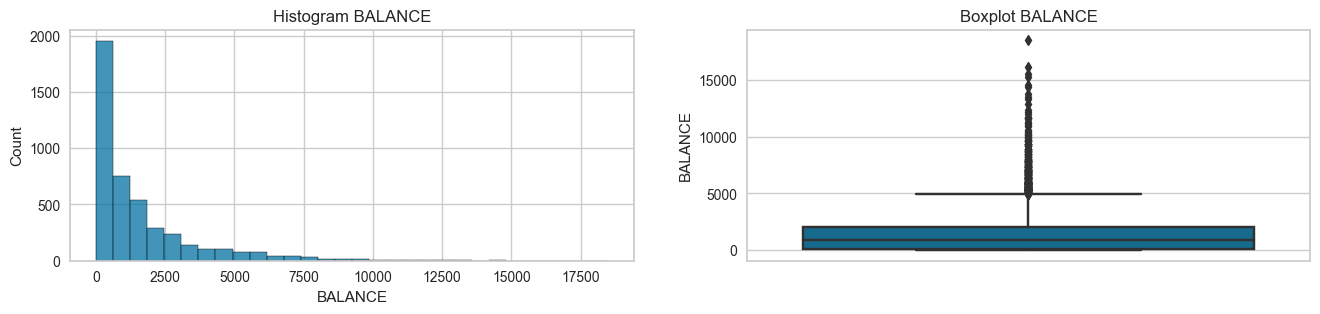


Skewness Value  BALANCE  :  2.3290088807150915


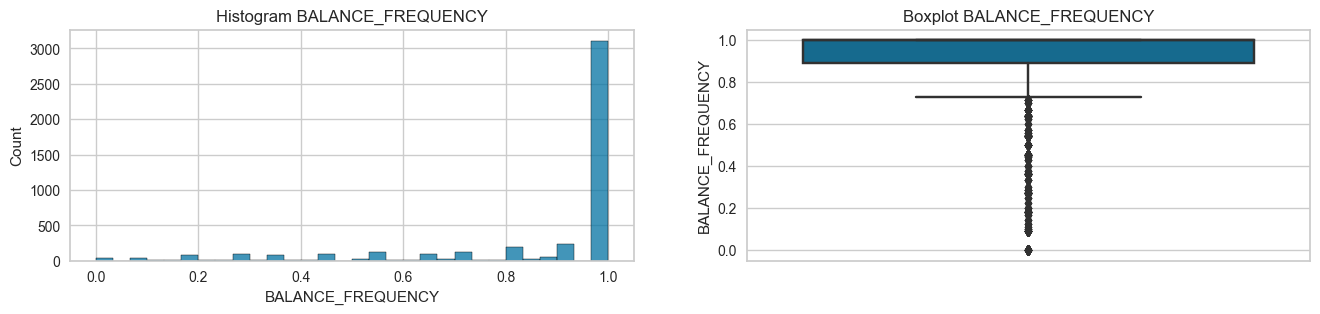


Skewness Value  BALANCE_FREQUENCY  :  -2.026529776439142


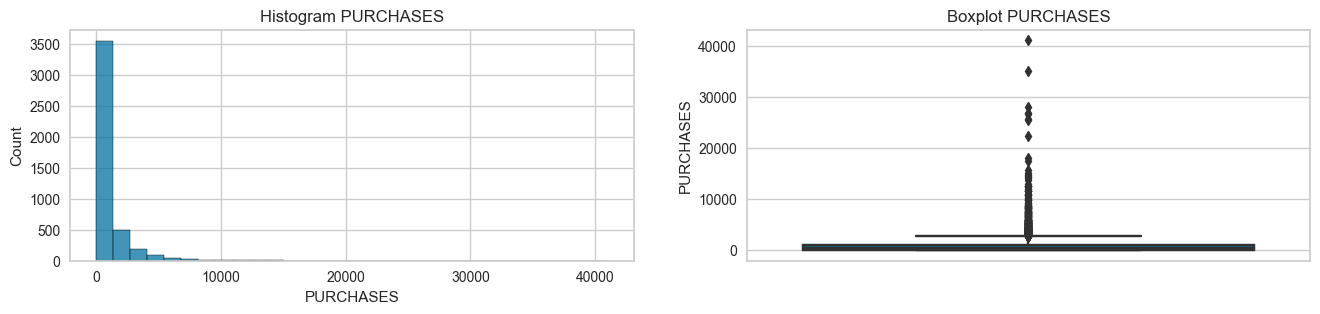


Skewness Value  PURCHASES  :  7.071705718331177


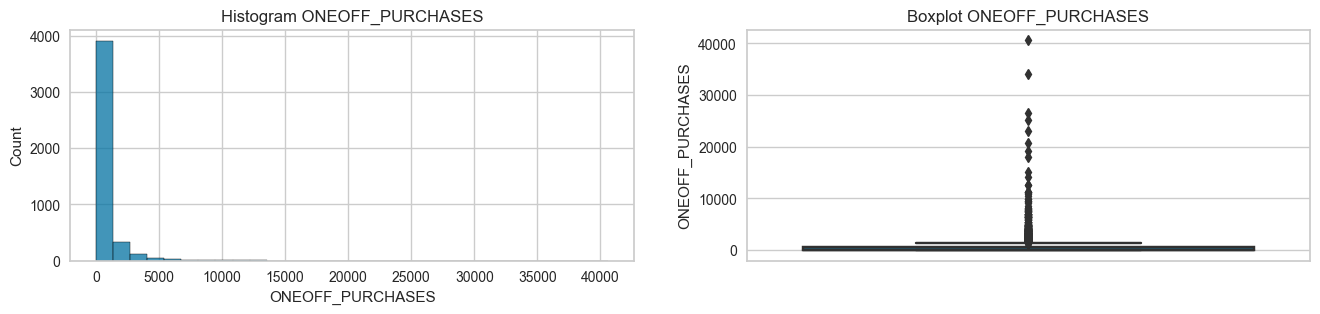


Skewness Value  ONEOFF_PURCHASES  :  9.951056583113456


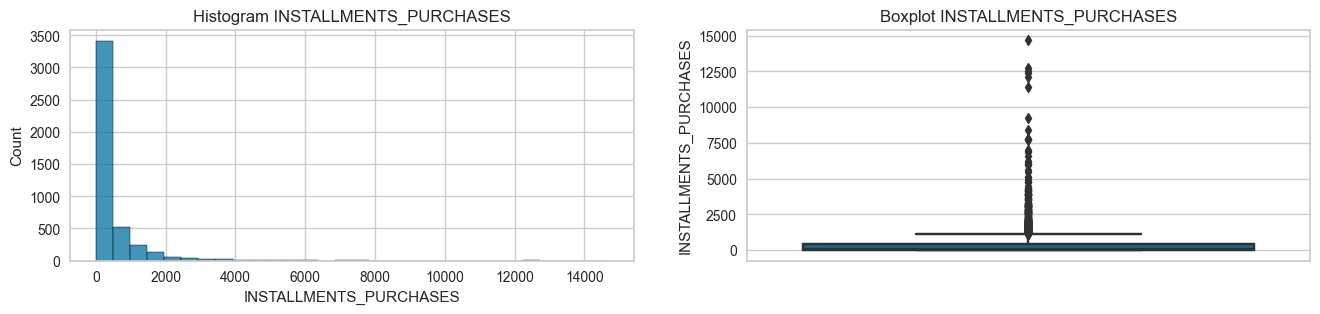


Skewness Value  INSTALLMENTS_PURCHASES  :  6.330629906494809


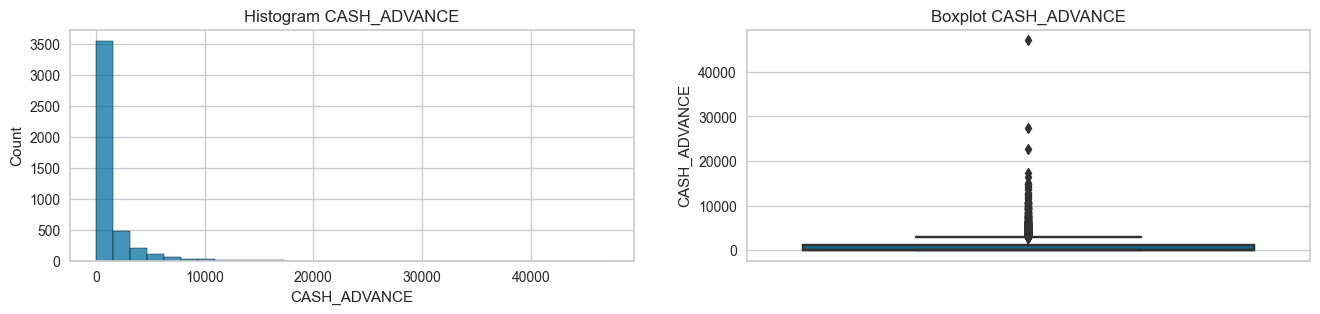


Skewness Value  CASH_ADVANCE  :  5.638109294257693


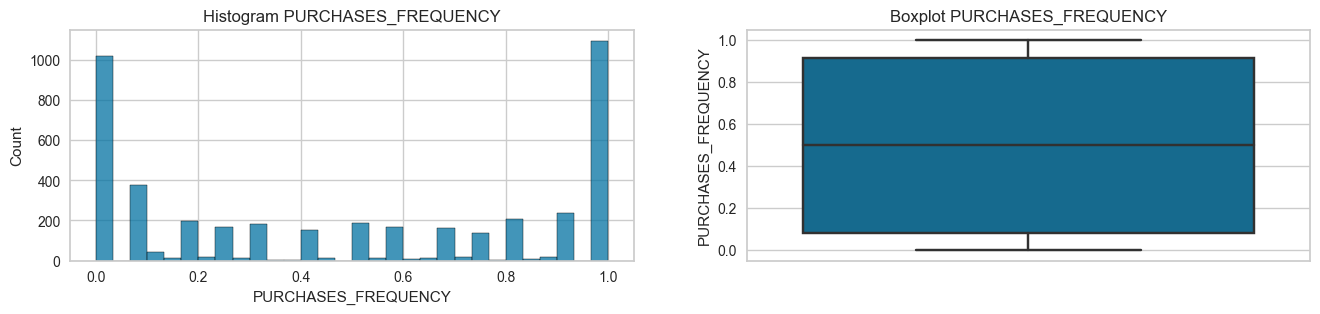


Skewness Value  PURCHASES_FREQUENCY  :  0.05875497991848613


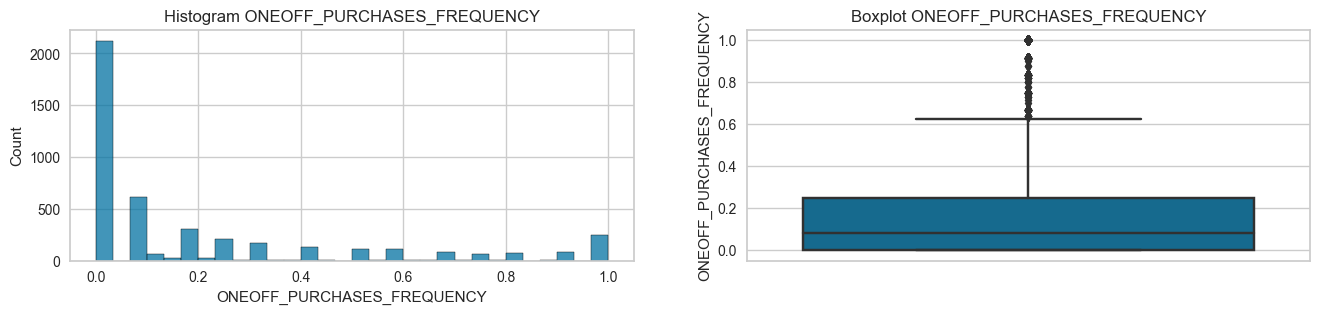


Skewness Value  ONEOFF_PURCHASES_FREQUENCY  :  1.5483193819148602


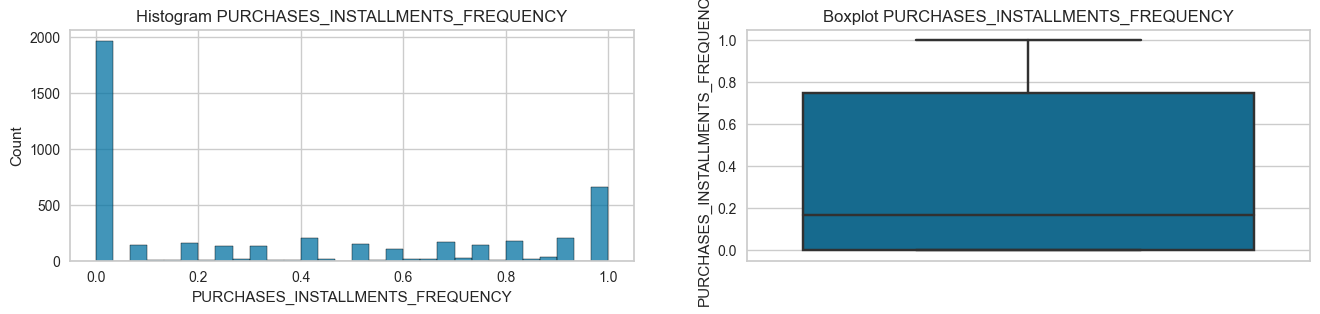


Skewness Value  PURCHASES_INSTALLMENTS_FREQUENCY  :  0.5082957786202944


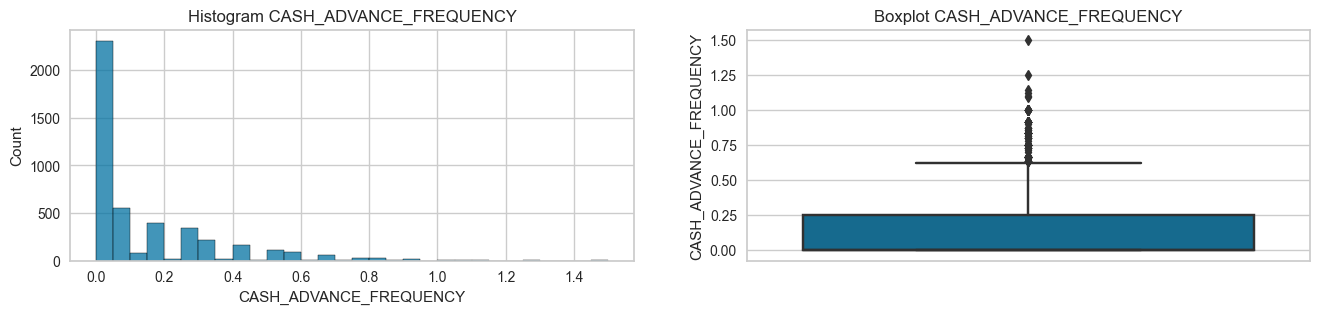


Skewness Value  CASH_ADVANCE_FREQUENCY  :  1.8342106501962343


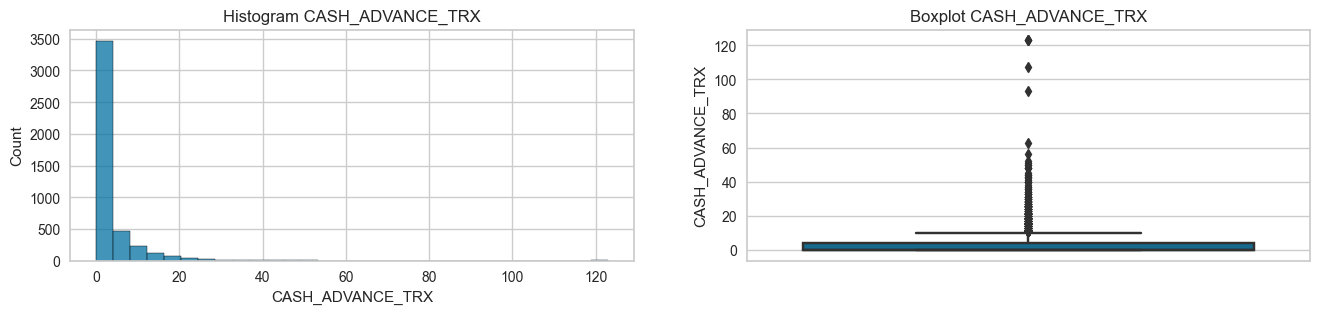


Skewness Value  CASH_ADVANCE_TRX  :  6.420103784668197


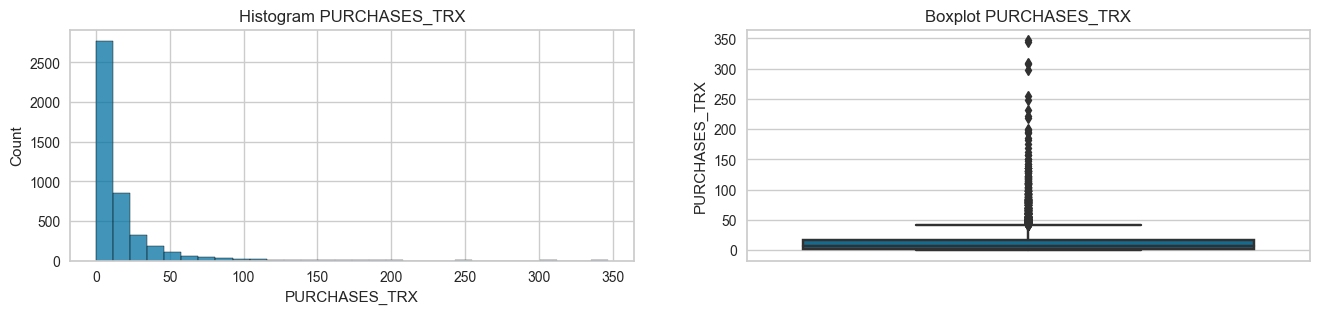


Skewness Value  PURCHASES_TRX  :  4.747507133980154


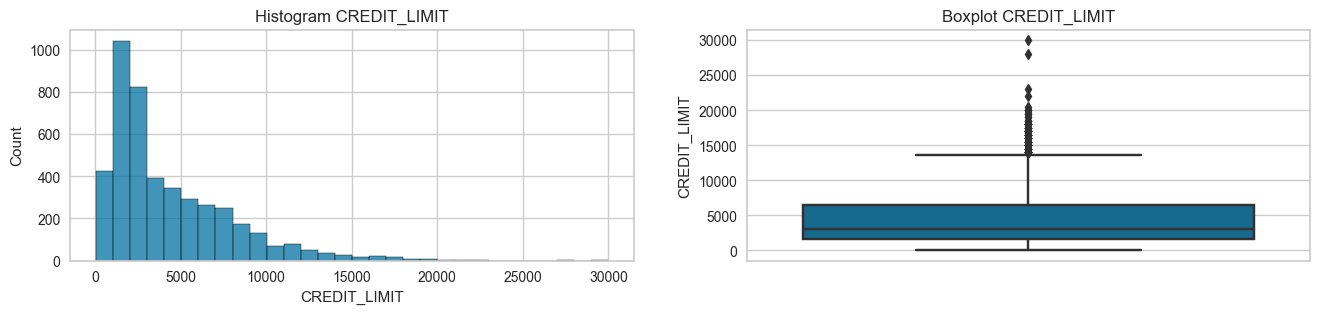


Skewness Value  CREDIT_LIMIT  :  1.498947716941148


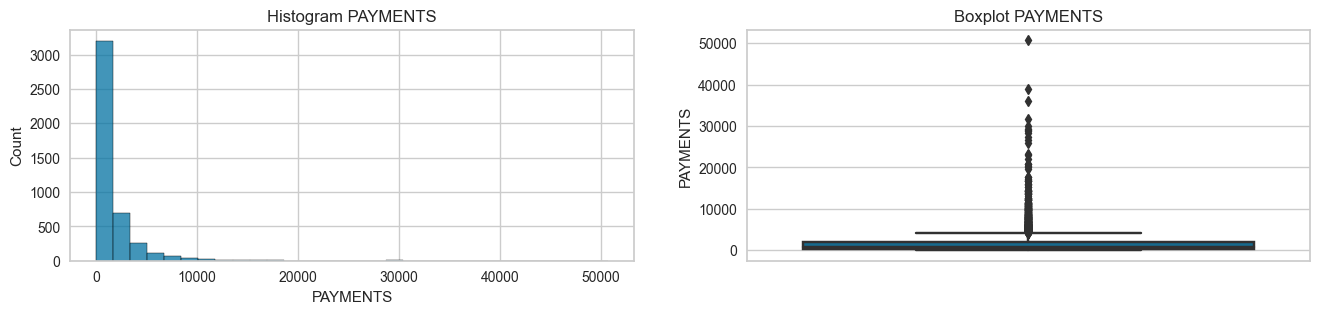


Skewness Value  PAYMENTS  :  5.747503259811283


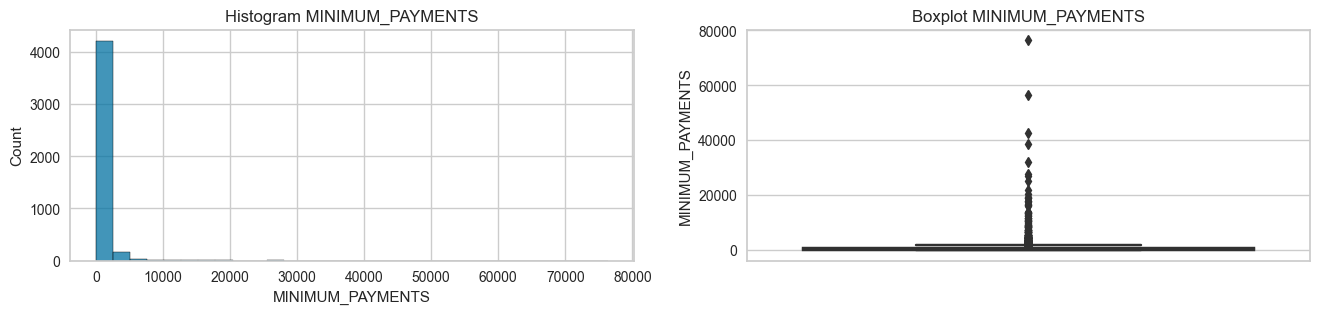


Skewness Value  MINIMUM_PAYMENTS  :  14.913415253196789


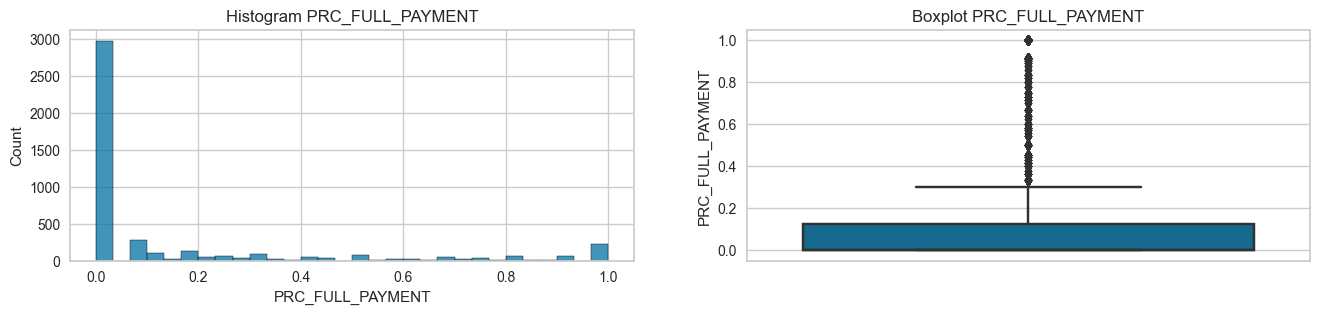


Skewness Value  PRC_FULL_PAYMENT  :  1.9752382754788178


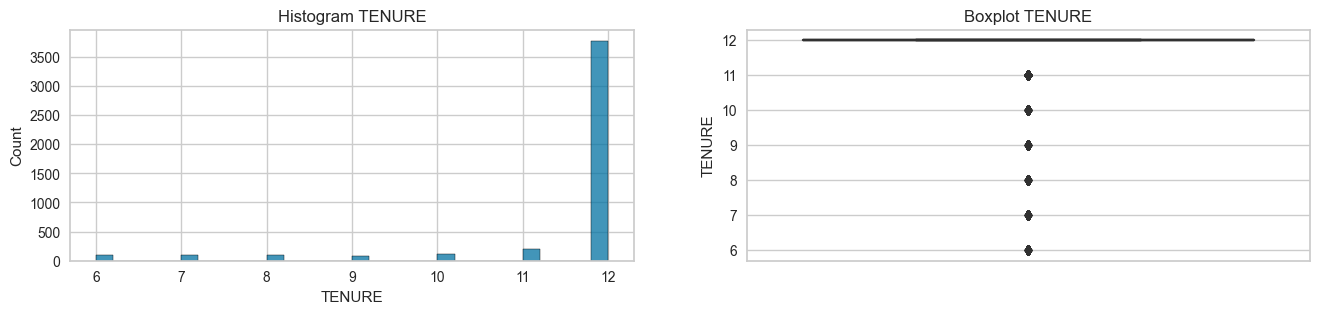


Skewness Value  TENURE  :  -2.954158581529189


In [43]:
#Pengecekan distribusi dan skew dari setiap feature numeric
for i in list_columns:
    diagnostic_plots(df, i)

In [44]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    global interq
    global lower_boundary
    global upper_boundary
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [45]:
#Pengecekan persentase outlier dari semua feature numerical
for i in list_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df, i)[0])/len(df)*100),2))
    print('Lower Boundary Feature ', i,'adalah ' ,round((outliers_check(df, i)[1]),2))
    print('Upper Boundary Feature ', i,'adalah ' ,round((outliers_check(df, i)[2]),2))
    print('---')

BALANCE
Jumlah Outlier Feature  BALANCE adalah  93
Persentase Outlier Feature  BALANCE adalah  2.08
Lower Boundary Feature  BALANCE adalah  -5644.98
Upper Boundary Feature  BALANCE adalah  7816.98
---
BALANCE_FREQUENCY
Jumlah Outlier Feature  BALANCE_FREQUENCY adalah  601
Persentase Outlier Feature  BALANCE_FREQUENCY adalah  13.43
Lower Boundary Feature  BALANCE_FREQUENCY adalah  0.56
Upper Boundary Feature  BALANCE_FREQUENCY adalah  1.33
---
PURCHASES
Jumlah Outlier Feature  PURCHASES adalah  208
Persentase Outlier Feature  PURCHASES adalah  4.65
Lower Boundary Feature  PURCHASES adalah  -3149.02
Upper Boundary Feature  PURCHASES adalah  4291.0
---
ONEOFF_PURCHASES
Jumlah Outlier Feature  ONEOFF_PURCHASES adalah  287
Persentase Outlier Feature  ONEOFF_PURCHASES adalah  6.41
Lower Boundary Feature  ONEOFF_PURCHASES adalah  -1725.66
Upper Boundary Feature  ONEOFF_PURCHASES adalah  2300.88
---
INSTALLMENTS_PURCHASES
Jumlah Outlier Feature  INSTALLMENTS_PURCHASES adalah  216
Persentase Ou

In [46]:
# Pemisahan feature berdasarkan skew
extreme_skew = []
not_extreme_skew = []
normal = []

for i in list_columns:
    if (df[i].skew() > 0.5 and df[i].skew() <= 1) or (df[i].skew() < -0.5 and df[i].skew() >= -1):
        not_extreme_skew.append(i)
    elif df[i].skew() >= 1 or df[i].skew() <= -1:
         extreme_skew.append(i)   
    else:
        normal.append(i)

#Remove Feature Tenure karena nanti akan di handling terpisah
extreme_skew.remove('TENURE')


In [47]:
#Membagi DF sesuai dengan skew-nya
df_extreme_skew = df[extreme_skew]
df_skew = df[not_extreme_skew]
df_normal = df[normal]

In [48]:
#Definisi Winsorizer
windsoriser_extreme = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both',
                          fold=3,variables=extreme_skew)
windsoriser_skew = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both',
                          fold=1.5,variables=not_extreme_skew)

In [49]:
#Fit and transform
df_wins_extreme = windsoriser_extreme.fit_transform(df_extreme_skew)
df_wins_skew = windsoriser_skew.fit_transform(df_skew)

In [50]:
#Cek Upper Limit dan Lower Limit Feature Tenure
lower_limit_tenure = outliers_check(df,'TENURE')[1]
upper_limit_tenure = outliers_check(df,'TENURE')[2]

print('Lower Boundary Feature Tenure adalah ', lower_limit_tenure)
print('Upper Boundary Feature Tenure adalah ', upper_limit_tenure)

Lower Boundary Feature Tenure adalah  12.0
Upper Boundary Feature Tenure adalah  12.0


In [51]:
#Replace Outlier dengan median
df["TENURE"] = np.where(((df["TENURE"] >upper_limit_tenure)|(df["TENURE"] <lower_limit_tenure)),df["TENURE"].median(),df['TENURE'])

In [52]:
# Concat 3 dataframe
df_no_outlier = pd.concat([df_wins_extreme,df_wins_skew,df_normal,df['TENURE']], axis=1)
df_no_outlier = df_no_outlier.loc[:, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
df_no_outlier


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.555556,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,12.0
1,0.000000,0.555556,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,12.0
2,757.964752,0.875000,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2632.441186,0.0,12.0
3,264.566591,0.555556,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,12.0
4,440.613643,1.000000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,7816.984649,1.000000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,12.0
4471,1040.030221,1.000000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,16,0,1400.0,290.129620,287.994171,0.0,12.0
4472,1322.818587,1.000000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,12.0
4473,1060.391273,1.000000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,12.0


In [53]:
#Pengecekan persentase outlier dari semua feature numerical
for i in list_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df_no_outlier, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df_no_outlier, i)[0])/len(df_no_outlier)*100),2))
    print('Skew dari Feature ', i,'adalah ' ,round(df_no_outlier[i].skew(),2))
    print('---')

BALANCE
Jumlah Outlier Feature  BALANCE adalah  0
Persentase Outlier Feature  BALANCE adalah  0.0
Skew dari Feature  BALANCE adalah  1.72
---
BALANCE_FREQUENCY
Jumlah Outlier Feature  BALANCE_FREQUENCY adalah  0
Persentase Outlier Feature  BALANCE_FREQUENCY adalah  0.0
Skew dari Feature  BALANCE_FREQUENCY adalah  -1.44
---
PURCHASES
Jumlah Outlier Feature  PURCHASES adalah  0
Persentase Outlier Feature  PURCHASES adalah  0.0
Skew dari Feature  PURCHASES adalah  1.79
---
ONEOFF_PURCHASES
Jumlah Outlier Feature  ONEOFF_PURCHASES adalah  0
Persentase Outlier Feature  ONEOFF_PURCHASES adalah  0.0
Skew dari Feature  ONEOFF_PURCHASES adalah  1.71
---
INSTALLMENTS_PURCHASES
Jumlah Outlier Feature  INSTALLMENTS_PURCHASES adalah  0
Persentase Outlier Feature  INSTALLMENTS_PURCHASES adalah  0.0
Skew dari Feature  INSTALLMENTS_PURCHASES adalah  1.75
---
CASH_ADVANCE
Jumlah Outlier Feature  CASH_ADVANCE adalah  0
Persentase Outlier Feature  CASH_ADVANCE adalah  0.0
Skew dari Feature  CASH_ADVANCE 

In [54]:
#Definisi scaler kemudian fit dan transform
scaler = RobustScaler()
df_scaled= pd.DataFrame(scaler.fit_transform(df_no_outlier), columns=df_no_outlier.columns.to_list())
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.451097,-4.000000,-0.296370,-0.001130,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.510204,-0.571776,0.000000,0.0,0.0
1,-0.453090,-4.000000,-0.173090,0.226661,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,0.816327,-0.571776,0.000000,0.0,0.0
2,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.0625,-0.367347,0.402028,3.766818,0.0,0.0
3,-0.315520,-4.000000,0.743278,1.919874,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.367347,1.402169,-0.371329,0.0,0.0
4,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.408163,-0.431475,-0.286166,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,3.611613,0.000000,-0.338709,-0.079361,-0.194391,3.839179,-0.600000,-0.333332,-0.222223,2.18182,2.25,-0.4375,1.836735,1.037017,2.957478,0.0,0.0
4471,0.087708,0.000000,-0.338709,-0.079361,-0.194391,1.221058,-0.600000,-0.333332,-0.222223,2.18182,4.00,-0.4375,-0.326531,-0.382727,-0.042220,0.0,0.0
4472,0.234753,0.000000,-0.338709,-0.079361,-0.194391,0.669338,-0.600000,-0.333332,-0.222223,2.18182,2.75,-0.4375,-0.306122,0.103039,-0.001860,0.0,0.0
4473,0.098296,0.000000,-0.338709,-0.079361,-0.194391,1.295877,-0.600000,-0.333332,-0.222223,2.18182,2.50,-0.4375,-0.204082,-0.306339,-0.059944,0.0,0.0


In [55]:
#Fit & Train ke PCA
pca = PCA()
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

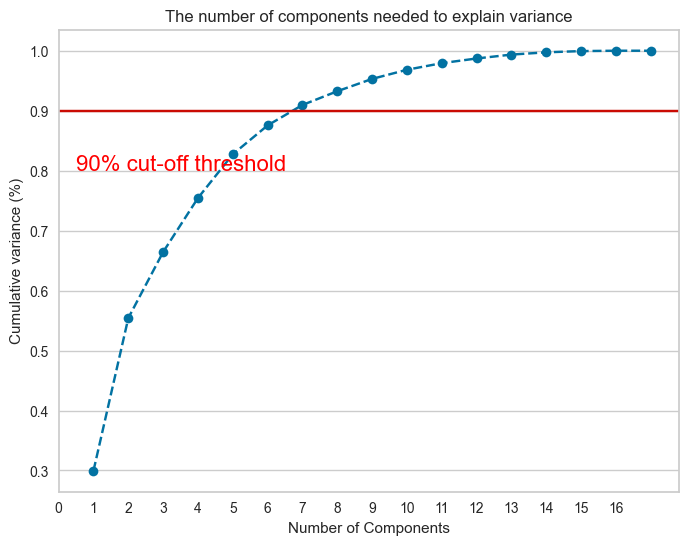

In [56]:
#Plot ke grafik
plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.80, '90% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

Dari informasi diatas maka dapat disimpulkan bahwa **`n_component` untuk PCA yang dapat menjelaskan 90% *variansi* adalah 7 komponen**. **90% dipilih karena kenaikan variansi di-atas 90% tidak signifikan, akan tetapi penambahan komponennya signifikan**

In [57]:
#Reduksi komponen menggunakan PCA
pca_final = PCA(n_components=7)
pca_final.fit(df_scaled)
X_pca = pca_final.transform(df_scaled)

In [58]:
#print Shape
print('Shape sebelum reduksi komponen ', df_scaled.shape)
print('---')
print('Shape setelah reduksi komponen ', X_pca.shape)
print('Jumlah komponen setelah reduksi ', pca_final.n_components_)
print('Variansi yang dapat dijelaskan ', round((np.sum(pca_final.explained_variance_ratio_)*100),2))

Shape sebelum reduksi komponen  (4475, 17)
---
Shape setelah reduksi komponen  (4475, 7)
Jumlah komponen setelah reduksi  7
Variansi yang dapat dijelaskan  90.96


Dari informasi diatas dapat disimpulkan bahwa :

- Reduksi komponen dari 17 komponen ke 7 komponen
- Variansi yang dapat dijelaskan dari hasil reduksi komponen adalah 90,96%

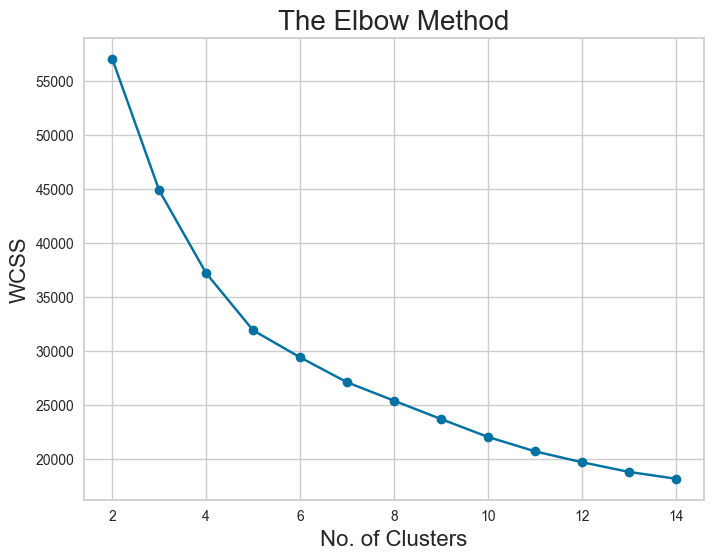

In [59]:
#Mendefinisikan variabel kosong wcss
wcss = []

#Membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(X_pca)
    wcss.append(km.inertia_)

#Membuat visualisasi wcss
plt.plot(range(2, 15), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters', fontsize = 16)
plt.ylabel('WCSS', fontsize = 16)
plt.show()

Dari informasi diatas *elbow* terdapat pada `n_clusters` 5. **Yang artinya, penambahan `n_cluster` diatas 5, tidak berpengaruh signifikan terhadap variansi *inertia***. Selanjutnya akan saya cek *elbow* tersebut dengan *Silhouette Method*

In [60]:
#Print Average Silhouette Score
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
  km.fit(X_pca)
  score = silhouette_score(X_pca, km.labels_, metric='euclidean')
  print('Silhouette Score Komponen', i ,':' ,'%.3f' % score)

Silhouette Score Komponen 2 : 0.326
Silhouette Score Komponen 3 : 0.279
Silhouette Score Komponen 4 : 0.284
Silhouette Score Komponen 5 : 0.309
Silhouette Score Komponen 6 : 0.302
Silhouette Score Komponen 7 : 0.300


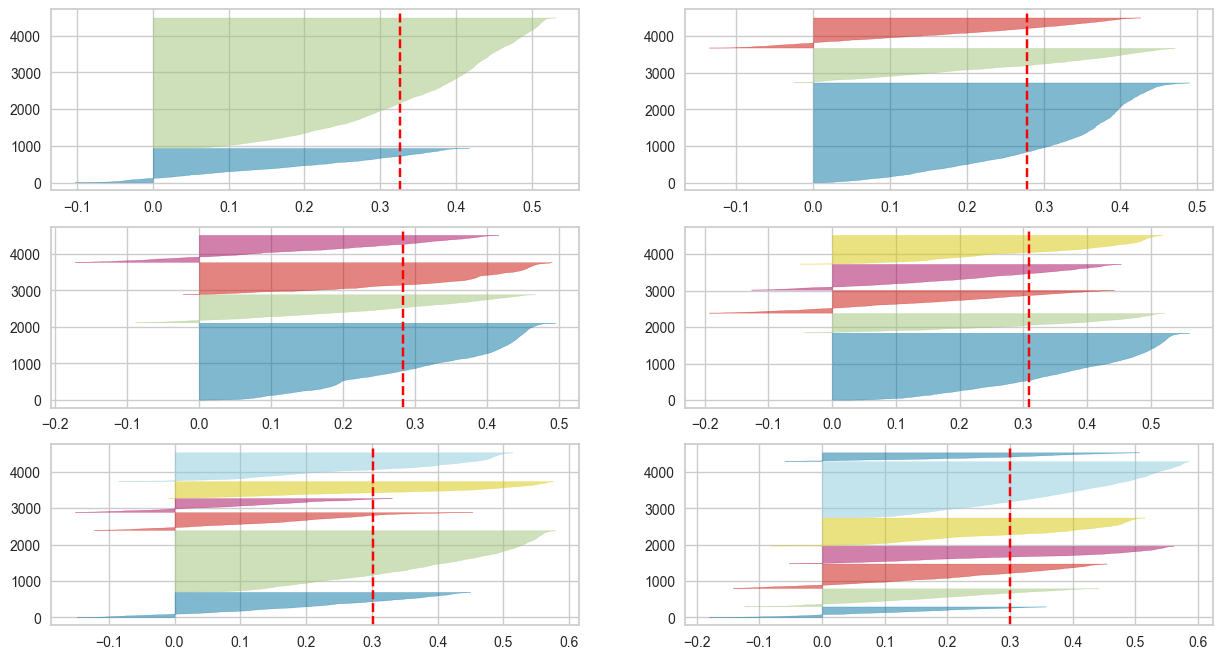

In [61]:
#Visualisasi Silhouette Score
fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_pca)

In [62]:
#Fit,Training dan predict KMeans
km_final = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
clusters = km_final.fit_predict(X_pca)
clusters

array([4, 4, 0, ..., 0, 0, 3])

In [63]:
#Print iterasi yang konvergen
km_final.n_iter_

9

Berdasarkan informasi diatas, iterasi **sudah konvergen pada iterasi ke 9**. Sehingga saya tidak perlu mengubah parameter untuk *training* ulang

In [64]:
#Reduksi komponen menggunakan PCA
pca_visualisasi = PCA(n_components=2)
pca_visualisasi.fit(df_scaled)
X_visualisasi = pca_visualisasi.transform(df_scaled)

In [65]:
#Membuat dataframe PC1 dan PC2
reduced_data= pd.DataFrame(X_visualisasi, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-2.593517,-1.967073
1,-2.279512,-1.825741
2,-1.081377,0.637695
3,-0.811109,-1.728191
4,-1.049749,-0.839178


In [66]:
#Concat dengan Cluster
reduced_data['Clusters']= clusters
reduced_data.head()

,PC1,PC2,Clusters
0,-2.593517,-1.967073,4
1,-2.279512,-1.825741,4
2,-1.081377,0.637695,0
3,-0.811109,-1.728191,4
4,-1.049749,-0.839178,0


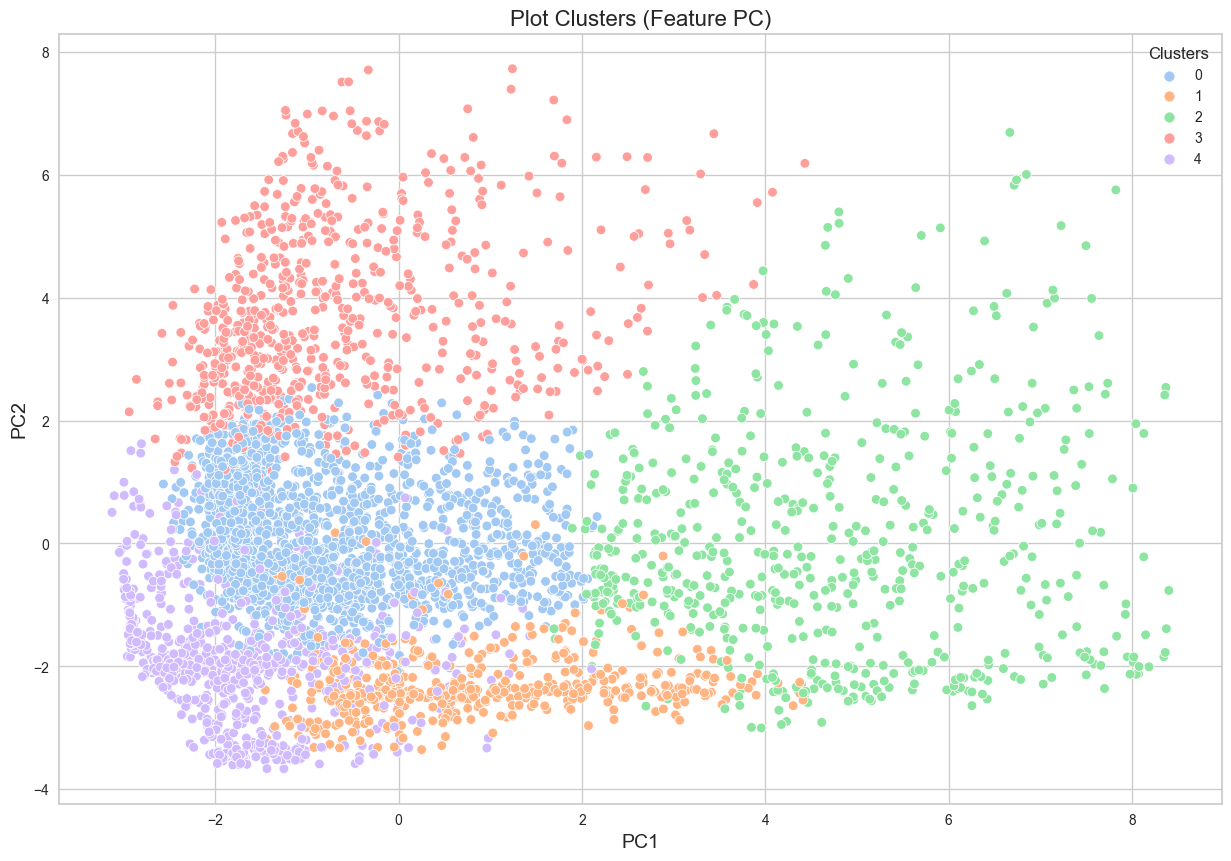

In [67]:
#Visualisasi cluster
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=reduced_data, hue="Clusters",palette='pastel')
plt.title('Plot Clusters (Feature PC)',fontsize=16)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

Dari informasi diatas dapat disimpulkan :

- Setiap *cluster* yang memiliki PC2 > 2 banyak yang tersebar
- *Cluster* 0 terpusat di titik PC1 <2 dan PC2 <2
- *Cluster* 1 terpusat di titik PC1 <5 dan PC2 <1
- *Cluster* 2 adalah *cluster* yang paling menyebar dengan nilai PC1>2 dan PC2<7
- *Cluster* 3 terpusat di titik PC1 >2 dan PC2 <8. *Cluster* ini adalah juga *cluster* yang tersebar (tidak terpusat)
- *Cluster* 4 terpusat di titik PC1 <0 dan PC2 <2

In [68]:
#Concat dengan cluster
df_cluster = df_no_outlier.copy()
df_cluster['Clusters']= clusters
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,3.833185,0.555556,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,12.0,4
1,0.000000,0.555556,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,12.0,4
2,757.964752,0.875000,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2632.441186,0.0,12.0,0
3,264.566591,0.555556,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,12.0,4
4,440.613643,1.000000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,7816.984649,1.000000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,12.0,3
4471,1040.030221,1.000000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,16,0,1400.0,290.129620,287.994171,0.0,12.0,3
4472,1322.818587,1.000000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,12.0,0
4473,1060.391273,1.000000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,12.0,0


In [69]:
#Print Statistik Deskripsi Dasar dari setiap Cluster
df_cluster.groupby('Clusters').describe()

BALANCE                                                     \
           count         mean          std         min          25%   
Clusters                                                              
0         1834.0  1295.476753  1110.750778    1.591980   477.839281   
1          530.0   125.366688   173.315502    4.822037    37.912620   
2          621.0  2244.139430  2178.421688   12.423203   536.104848   
3          704.0  4014.182409  2193.219525  236.996845  2146.883802   
4          786.0   176.679122   354.743901    0.000000     7.628297   

                                                BALANCE_FREQUENCY            \
                  50%          75%          max             count      mean   
Clusters                                                                      
0         1085.882907  1704.285801  7024.269179            1834.0  0.984674   
1           76.666485   142.977496  1565.982050             530.0  0.942834   
2         1482.235539  3145.204423  7816.984649             621.0  0.979074   
3         3699.201468  5776.920371  7816.984649             704.0  0.970813   
4           31.802342   155.661758  2953.212886             786.0  0.586616   

                                                                      \
               std       min       25%       50%       75%       max   
Clusters                                                               
0         0.044715  0.727273  1.000000  1.000000  1.000000  1.000000   
1         0.097501  0.636364  0.909091  1.000000  1.000000  1.000000   
2         0.068822  0.555556  1.000000  1.000000  1.000000  1.000000   
3         0.073556  0.555556  1.000000  1.000000  1.000000  1.000000   
4         0.060947  0.555556  0.555556  0.555556  0.555556  0.833333   

         PURCHASES                                                        \
             count         mean         std     min        25%       50%   
Clusters                                                                   
0           1834.0   408.719062  486.828687    0.00     0.0000   234.010   
1            530.0   955.830774  742.786795    0.00   421.7075   771.955   
2            621.0  3215.626667  982.416171  883.94  2336.3200  3278.420   
3            704.0   353.890114  574.092001    0.00     0.0000    33.500   
4            786.0   325.177697  439.741885    0.00    24.9025   154.025   

                             ONEOFF_PURCHASES                                \
                75%      max            count         mean         std  min   
Clusters                                                                      
0          624.0675  3034.92           1834.0   213.133413  371.559642  0.0   
1         1301.3425  4291.00            530.0   284.515981  451.274494  0.0   
2         4291.0000  4291.00            621.0  1748.763559  682.650849  0.0   
3          512.1600  4115.95            704.0   200.809062  381.639845  0.0   
4          429.6600  2581.01            786.0   189.977341  390.547556  0.0   

                                               INSTALLMENTS_PURCHASES  \
              25%      50%        75%      max                  count   
Clusters                                                                
0            0.00     0.00   284.9175  2300.88                 1834.0   
1            0.00     0.00   446.2575  2300.88                  530.0   
2         1340.34  2098.46  2300.8800  2300.88                  621.0   
3            0.00     0.00   229.2500  2300.88                  704.0   
4            0.00     0.00   175.3575  2300.88                  786.0   

                                                                             \
                mean         std  min      25%      50%        75%      max   
Clusters                                                                      
0         192.963779  320.456924  0.0    0.000    0.000   284.3775  1823.54   
1         620.967113  518.008035  0.0  229.875  471.145   930.0400  1823.54   
2       

Dari informasi diatas dapat disimpulkan bahwa (Nanti akan saya rangkum ke bahasa yang lebih singkat dan mudah difahami secara bisnis) :

**Cluster 0**
- Sering *update balance*  
- Tidak sering melakukan pembelian
- Memiliki *credit limit* paling rendah dari pada *cluster* lain
- Memiliki *payments* paling rendah dari pada *cluster* lain
- Memiliki persentase *payments* lebih rendah dari pada *cluster* lain

**Cluster 1**

- Memiliki *balance* yang paling rendah dari semua *cluster*, dengan rata-rata 125
- Sering *update balance*  
- Memiliki *value* pembelian dengan metode *Cash Advance* paling rendah di-antara *cluster* lain
- Sering melakukan pembelian
- Sering melakukan pembelian dengan metode *Installment Purchases* dari pada *cluster* lain
- Tidak sering melakukan pembelian dengan metode *Cash Advance* dari pada *cluster* lain
- Memiliki persentase *payments* lebih tinggi dari pada *cluster* lain

**Cluster 2**

- Sering *update balance*  
- Memiliki pembelian dengan *value* yang paling tinggi diantara *cluster* lain 
- Pada metode *One Off Purchases* dan *Installment Purchases*, memiliki pembelian dengan *value* yang paling tinggi diantara *cluster* lain 
- Sering melakukan pembelian dari pada semua *cluster*
- Sering melakukan pembelian dengan metode *One Off Purchases* dari pada *cluster* lain
- Memiliki *credit limit* paling tinggi dari pada *cluster* lain
- Memiliki *payments* paling tinggi dari pada *cluster* lain

**Cluster 3**

- Memiliki *balance* yang paling tinggi dari semua *cluster*, dengan rata-rata 4.014
- Sering *update balance*  
- Memiliki *value* pembelian dengan metode *Cash Advance* paling tinggi di-antara *cluster* lain
- Paling tidak sering melakukan pembelian dari pada semua *cluster*
- Tidak sering melakukan pembelian dengan metode *Installment Purchases* dari pada *cluster* lain
- Sering melakukan pembelian dengan metode *Cash Advance* dari pada *cluster* lain



**Cluster 4**
- Tidak sering *update balance*  
- Memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain
- Pada metode *One Off Purchases* dan *Installment Purchases*, memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain 
- Tidak sering melakukan pembelian
- Tidak sering melakukan pembelian dengan metode *One Off Purchases* dari pada *cluster* lain


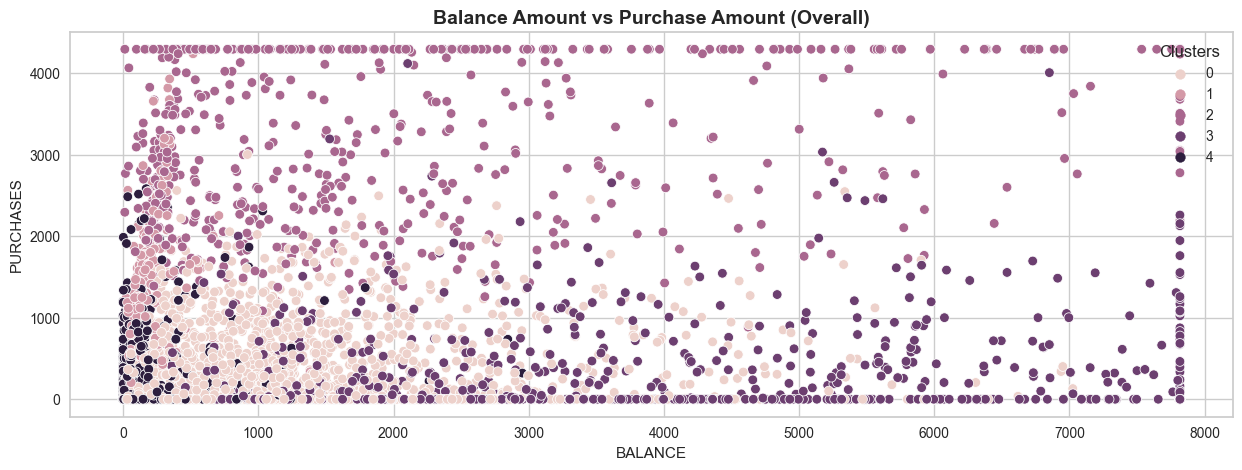

In [70]:
#Visualisasi Balance Amount VS Purchase Amount
plt.figure(figsize=(15,5))

sns.scatterplot(x="BALANCE", y="PURCHASES", hue="Clusters", data=df_cluster)
plt.title('Balance Amount vs Purchase Amount (Overall)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [71]:
#Print mean, median
df_cluster[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','Clusters']].groupby('Clusters').describe()

BALANCE                                                     \
           count         mean          std         min          25%   
Clusters                                                              
0         1834.0  1295.476753  1110.750778    1.591980   477.839281   
1          530.0   125.366688   173.315502    4.822037    37.912620   
2          621.0  2244.139430  2178.421688   12.423203   536.104848   
3          704.0  4014.182409  2193.219525  236.996845  2146.883802   
4          786.0   176.679122   354.743901    0.000000     7.628297   

                                                ONEOFF_PURCHASES               \
                  50%          75%          max            count         mean   
Clusters                                                                        
0         1085.882907  1704.285801  7024.269179           1834.0   213.133413   
1           76.666485   142.977496  1565.982050            530.0   284.515981   
2         1482.235539  3145.204423  7816.984649            621.0  1748.763559   
3         3699.201468  5776.920371  7816.984649            704.0   200.809062   
4           31.802342   155.661758  2953.212886            786.0   189.977341   

                                                                 \
                 std  min      25%      50%        75%      max   
Clusters                                                          
0         371.559642  0.0     0.00     0.00   284.9175  2300.88   
1         451.274494  0.0     0.00     0.00   446.2575  2300.88   
2         682.650849  0.0  1340.34  2098.46  2300.8800  2300.88   
3         381.639845  0.0     0.00     0.00   229.2500  2300.88   
4         390.547556  0.0     0.00     0.00   175.3575  2300.88   

         INSTALLMENTS_PURCHASES                                        \
                          count        mean         std  min      25%   
Clusters                                                                
0                        1834.0  192.963779  320.456924  0.0    0.000   
1                         530.0  620.967113  518.008035  0.0  229.875   
2                         621.0  989.712850  680.694428  0.0  355.000   
3                         704.0  144.968849  326.472969  0.0    0.000   
4                         786.0  134.102137  245.188754  0.0    0.000   

                                      CASH_ADVANCE                            \
              50%        75%      max        count         mean          std   
Clusters                                                                       
0           0.000   284.3775  1823.54       1834.0   416.863735   649.871761   
1         471.145   930.0400  1823.54        530.0    59.193181   357.394062   
2         976.600  1823.5400  1823.54        621.0   551.169931  1109.601809   
3           0.000   110.0325  1823.54        704.0  3205.548901  1250.336150   
4           0.000   174.3450  1823.54        786.0   397.270801   865.883062   

                                                                          
                 min          25%          50%          75%          max  
Clusters                                                                  
0           0.000000     0.000000    58.187716   655.346067  4555.551016  
1           0.000000     0.000000     0.000000     0.000000  4555.551016  
2           0.000000     0.000000     0.000000   451.622190  4555.551016  
3         266.975744  2237.782885  3345.775783  4555.551016  4555.551016  
4           0.000000     0.000000     0.000000   295.350369  4555.551016

Dari visualisasi diatas dapat disimpulkan bahwa :

**Cluster 0**

- Memiliki *value purchase* yang rendah (terpusat dibawah 2.000)

**Cluster 1**

- Memiliki *value* pembelian dengan metode *Cash Advance* paling rendah di-antara *cluster* lain (terpusat dibawah 3.000)

**Cluster 2**

- Pada metode *One Off Purchases* dan *Installment Purchases*, memiliki pembelian dengan *value* yang paling tinggi diantara *cluster* lain (terpusat diatas 1.750)

**Cluster 3**

- Memiliki *balance* yang paling tinggi dari semua *cluster* (terpusat diatas 4.000)
- Memiliki *value* pembelian dengan metode *Cash Advance* paling tinggi di-antara *cluster* lain (terpusat diatas 4.000)


**Cluster 4** 
- Memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain (terpusat dibawah 3.000)
- Pada metode *One Off Purchases* dan *Installment Purchases*, memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain (terpusat diatas 1.000)

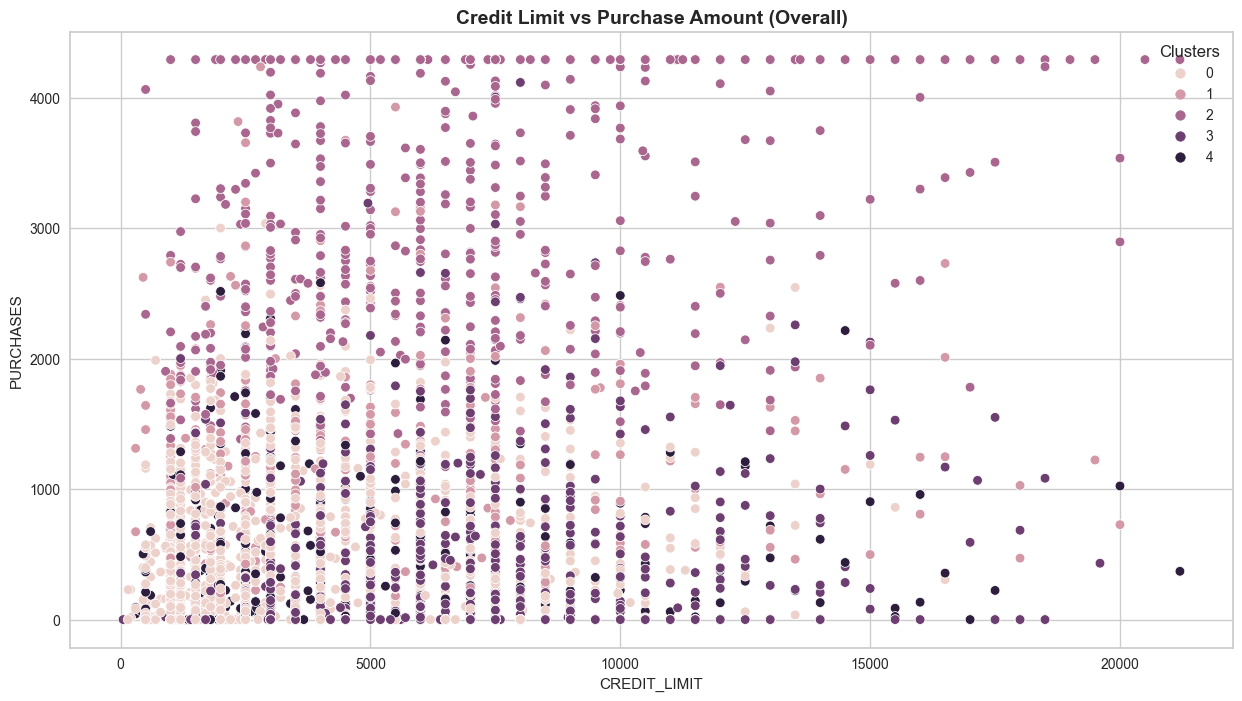

In [72]:
#Visualisasi Credit Limit VS Purchase Amount
plt.figure(figsize=(15,8))

sns.scatterplot(x="CREDIT_LIMIT", y="PURCHASES", hue="Clusters", data=df_cluster)
plt.title('Credit Limit vs Purchase Amount (Overall)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [73]:
#Print mean, median
df_cluster[['CREDIT_LIMIT','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','Clusters']].groupby('Clusters').describe()

CREDIT_LIMIT                                                   \
                count         mean          std    min     25%     50%   
Clusters                                                                 
0              1834.0  3153.135224  2562.494871  150.0  1400.0  2400.0   
1               530.0  4281.801029  3487.017521  300.0  1500.0  3000.0   
2               621.0  7044.605475  4201.583693  500.0  4000.0  6500.0   
3               704.0  6722.023502  3574.756208   50.0  4000.0  6000.0   
4               786.0  3736.861040  3160.816464  300.0  1500.0  3000.0   

                          ONEOFF_PURCHASES                                \
             75%      max            count         mean         std  min   
Clusters                                                                   
0         4000.0  16500.0           1834.0   213.133413  371.559642  0.0   
1         6000.0  20000.0            530.0   284.515981  451.274494  0.0   
2         9500.0  21200.0            621.0  1748.763559  682.650849  0.0   
3         9000.0  19600.0            704.0   200.809062  381.639845  0.0   
4         5000.0  21200.0            786.0   189.977341  390.547556  0.0   

                                               INSTALLMENTS_PURCHASES  \
              25%      50%        75%      max                  count   
Clusters                                                                
0            0.00     0.00   284.9175  2300.88                 1834.0   
1            0.00     0.00   446.2575  2300.88                  530.0   
2         1340.34  2098.46  2300.8800  2300.88                  621.0   
3            0.00     0.00   229.2500  2300.88                  704.0   
4            0.00     0.00   175.3575  2300.88                  786.0   

                                                                             \
                mean         std  min      25%      50%        75%      max   
Clusters                                                                      
0         192.963779  320.456924  0.0    0.000    0.000   284.3775  1823.54   
1         620.967113  518.008035  0.0  229.875  471.145   930.0400  1823.54   
2         989.712850  680.694428  0.0  355.000  976.600  1823.5400  1823.54   
3         144.968849  326.472969  0.0    0.000    0.000   110.0325  1823.54   
4         134.102137  245.188754  0.0    0.000    0.000   174.3450  1823.54   

         CASH_ADVANCE                                                     \
                count         mean          std         min          25%   
Clusters                                                                   
0              1834.0   416.863735   649.871761    0.000000     0.000000   
1               530.0    59.193181   357.394062    0.000000     0.000000   
2               621.0   551.169931  1109.601809    0.000000     0.000000   
3               704.0  3205.548901  1250.336150  266.975744  2237.782885   
4               786.0   397.270801   865.883062    0.000000     0.000000   

                                                 
                  50%          75%          max  
Clusters                                         
0           58.187716   655.346067  4555.551016  
1            0.000000     0.000000  4555.551016  
2            0.000000   451.622190  4555.551016  
3         3345.775783  4555.551016  4555.551016  
4            0.000000   295.350369  4555.551016

Dari Visualisasi diatas dapat disimpulkan bahwa :

**Cluster 0**
- Memiliki *credit limit* paling rendah dari pada *cluster* lain (terpusat di bawah 4.000)


**Cluster 1**

- Sering melakukan pembelian dengan metode *Installment Purchases* dari pada *cluster* lain
- Memiliki *credit limit* terpusat dibawah 6000

**Cluster 2**

- Memiliki *credit limit* paling tinggi dari pada *cluster* lain (terpusat diatas 10.000)
- Memiliki pembelian dengan *value* yang paling tinggi diantara *cluster* lain 

**Cluster 3**

- Memiliki *value* pembelian dengan metode *Cash Advance* paling tinggi di-antara *cluster* lain
- Memiliki *credit limit* terpusat dibawah 6000 (hampir sama seperti *cluster* 1)


**Cluster 4** 
- Memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain
- Pada metode *One Off Purchases* dan *Installment Purchases*, memiliki pembelian dengan *value* yang paling rendah diantara *cluster* lain 
- Memiliki *credit limit* terpusat dibawah 3000 (hampir sama seperti *cluster* 1)


Berdasarkan informasi diatas dapat disimpulkan bahwa karakteristik setiap *cluster* adalah (narasi bisnis) :

**Cluster 0 (Tipe customer yang hemat)**

*Customer* pada *cluster* ini cenderung melakukan pembelian sesuai kebutuhan, karena *customer* ini jarang melakukan pembelian. Selain itu *customer* ini, memiliki *credit limit* yang rendah sehingga *value payment* yang dilakukan *customer* juga rendah. Akan tetapi *customer* ini sering melakukan *update balance* pada *credit card*-nya 


**Cluster 1(Tipe customer yang memiliki ekonomi rendah sehingga sering menggunakan metode cicilan)**

*Customer* pada *cluster* ini memiliki *balance* yang rendah dari pada *cluster* lain. Oleh karena itu *customer* ini, sering melakukan pembelian dengan metode *Installment*. *Balance* yang rendah juga menyebabkan *customer*,  memiliki *value* pembelian pada metode *Cash Advance* lebih rendah dari pada *cluster* lain (*customer* ini juga jarang menggunakan metode *cash advance*). Kemudian karena banyak cicilan (akibat *installment method*), *customer* ini memiliki persentase *payment* yang lebih tinggi dari pada *customer* lain. 

**Cluster 2 (Tipe customer yang memiliki ekonomi tinggi)**

*Customer* pada *cluster* ini memiliki *value* pembelian yang lebih tinggi dari pada *cluster* lain. Hal ini disebabkan *customer* memiliki *credit limit* yang lebih tinggi dari pada *cluster* lain. Karena sering melakukan pembelian maka jumlah *payments* dari *customer* ini lebih tinggi dari pada *cluster* lain. Metode yang sering digunakan *customer* ini adalah *One Off Purchases* (lebih sering dari pada *cluster* lain). *Customer* ini memiliki *value purchases* yang paling besar pada metode ini. *Customer* ini juga sering melakukan *update balance*

**Cluster 3 (Tipe customer yang mengincar barang berkualitas)**

*Customer* ini memiliki *balance* yang paling tinggi diantara *cluster* lain. Oleh karena itu *customer* ini lebih sering melakukan pembelian dengan metode *Cash Advance* dari pada metode *Installment Purchases* (memiliki *value* pembelian *cash advance* lebih tinggi dari pada *cluster* lain). Meskipun memiliki *balance* tinggi, *customer* pada *cluster* ini paling tidak sering melakukan pembelian (Tipe *customer* yang mengincar kualitas, karena jarang beli tp pada saat beli *value* nya tinggi). Selain itu *customer* juga sering melakukan *update balance*

**Cluster 4 (Tipe customer lebih senang menggunakan metode Cash)**

*Customer* pada *cluster* ini, memiliki *value* pembelian yang lebih rendah diantara *cluster* lain. *Customer* ini juga jarang melakukan pembelian dengan metode *Installment Purchases* dan *One Off Purchases*. *Customer* ini cenderung menggunakan metode *Cash Advance*. *Customer* ini juga paling jarang mengupdate *balance* nya dari pada semua *cluster*


In [74]:
# Save the Files

with open('windsoriser_extreme.pkl', 'wb') as file_1:
  pickle.dump(windsoriser_extreme, file_1)

with open('windsoriser_skew.pkl', 'wb') as file_2:
  pickle.dump(windsoriser_skew, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('pca_final.pkl', 'wb') as file_4:
  pickle.dump(pca_final, file_4)

with open('km_final.pkl', 'wb') as file_5:
  pickle.dump(km_final, file_5)

with open('extreme_skew.txt', 'w') as file_6:
  json.dump(extreme_skew, file_6)

with open('not_extreme_skew.txt', 'w') as file_7:
  json.dump(not_extreme_skew, file_7)

with open('normal.txt', 'w') as file_8:
  json.dump(normal, file_8)

Dari Penelitian diatas dapat diambil kesimpulan bahwa :

- *Marketing* merupakan poin yang krusial untuk perkembangan dan *sustainability* dari semua bisnis. Poin utama dari *marketing* adalah memahami *customer* dengan baik dan mengidentifikasi kebutuhan dari *customer*. Semakin responsif strategi *marketing* dalam mengidentifikasi dan memenuhi kebutuhan *customer*, maka bisnis akan semakin cepat berkembang. Segmentasi merupakan salah satu metode untuk mengelompokkan *customer* berdasarkan *behaviour*. Segmentasi memiliki tujuan akhir yaitu memahami *customer* dan memenuhi kebutuhan dari *customer* untuk setiap segmen target bisnis. Oleh karena itu dibutuhkan model segmentasi yang baik.

- Sebelum melakukan *clustering* saya perlu mengetahui faktor-faktor apa sajakah yang dapat membedakan setiap kelompok *customer* untuk memudahkan *clustering*. Berikut hasil eksplorasi saya :

    1. *Customer* yang memiliki *balance* tinggi (>15.000)  dan *amount purchase* yang rendah (<10.000) cenderung sering melakukan pembelian dengan metode *Installment Purchase*

    2. *Customer* yang memiliki *balance* kecil-menengah (<7.500)  dan *amount purchase* yang tinggi (>20.000) cenderung sering melakukan pembelian dengan metode *One Off Purchases* dan metode *Installment Purchase*. Selain itu *customer* pada kelas ini, tidak sering melakukan pembelian dengan metode *Cash Advance*\

    3. *Customer* banyak yang memiliki *balance* <10.000 dan *purchases* <10.000 (terpusat)

    4. *Customer* yang memiliki *credit limit* >=10.000  dan *amount purchase* >20.000 cenderung sering melakukan pembelian dengan metode *One Off Purchases* dan metode *Installment Purchase*

    5. Metode pembelian *Cash Advance* tidak sering digunakan *customer*

    6. *Customer* banyak yang memiliki *credit limit* <20.000 dan *purchases* <10.000 (terpusat)

    7. *Customer* yang memiliki *tenure* > 10  dan *amount purchase* yang >20.000) cenderung sering melakukan pembelian

    8. *Customer* yang memiliki *tenure* 6 dan 9  tidak sering menggunakan metode pembelian *cash advance*

    9. *Customer* banyak yang memiliki *tenure* 12 (terpusat)

    10. *Customer* banyak yang memiliki *credit limit* <20.000 dan *payment <20.000 (terpusat)


- *Clustering* menggunakan metode **KMeans** dengan 5 *cluster*, karakteristik dari setiap *cluster* adalah sebagai berikut :

    1. **Cluster 0 (Tipe customer yang hemat)**

    *Customer* pada *cluster* ini cenderung melakukan pembelian sesuai kebutuhan, karena *customer* ini jarang melakukan pembelian. Selain itu *customer* ini, memiliki *credit limit* yang rendah sehingga *value payment* yang dilakukan *customer* juga rendah. Akan tetapi *customer* ini sering melakukan *update balance* pada *credit card*-nya 


    2. **Cluster 1(Tipe customer yang memiliki ekonomi rendah sehingga sering menggunakan metode cicilan)**

    *Customer* pada *cluster* ini memiliki *balance* yang rendah dari pada *cluster* lain. Oleh karena itu *customer* ini, sering melakukan pembelian dengan metode *Installment*. *Balance* yang rendah juga menyebabkan *customer*,  memiliki *value* pembelian pada metode *Cash Advance* lebih rendah dari pada *cluster* lain (*customer* ini juga jarang menggunakan metode *cash advance*). Kemudian karena banyak cicilan (akibat *installment method*), *customer* ini memiliki persentase *payment* yang lebih tinggi dari pada *customer* lain. 

    3. **Cluster 2 (Tipe customer yang memiliki ekonomi tinggi)**

    *Customer* pada *cluster* ini memiliki *value* pembelian yang lebih tinggi dari pada *cluster* lain. Hal ini disebabkan *customer* memiliki *credit limit* yang lebih tinggi dari pada *cluster* lain. Karena sering melakukan pembelian maka jumlah *payments* dari *customer* ini lebih tinggi dari pada *cluster* lain. Metode yang sering digunakan *customer* ini adalah *One Off Purchases* (lebih sering dari pada *cluster* lain). *Customer* ini memiliki *value purchases* yang paling besar pada metode ini. *Customer* ini juga sering melakukan *update balance*

    4. **Cluster 3 (Tipe customer yang mengincar barang berkualitas)**

    *Customer* ini memiliki *balance* yang paling tinggi diantara *cluster* lain. Oleh karena itu *customer* ini lebih sering melakukan pembelian dengan metode *Cash Advance* dari pada metode *Installment Purchases* (memiliki *value* pembelian *cash advance* lebih tinggi dari pada *cluster* lain). Meskipun memiliki *balance* tinggi, *customer* pada *cluster* ini paling tidak sering melakukan pembelian (Tipe *customer* yang mengincar kualitas, karena jarang beli tp pada saat beli *value* nya tinggi). Selain itu *customer* juga sering melakukan *update balance*

    5. **Cluster 4 (Tipe customer lebih senang menggunakan metode Cash)**

    *Customer* pada *cluster* ini, memiliki *value* pembelian yang lebih rendah diantara *cluster* lain. *Customer* ini juga jarang melakukan pembelian dengan metode *Installment Purchases* dan *One Off Purchases*. *Customer* ini cenderung menggunakan metode *Cash Advance*. *Customer* ini juga paling jarang mengupdate *balance* nya dari pada semua *cluster*


- Model *Clustering* memiliki kelemahan dan kelebihan sebagai berikut :

    **Kelebihan** 

    1. Interpretasi mengapa data di-klusterkan ke suatu kelas cenderung lebih mudah
    2. Mudah di-implementasikan
    3. Model ini akan mencari *cluster* yang konvergen (jaminan sampai konvergen)
    4. *Computation Cost* yang rendah
    5. Jika tipe data terpusat dan berbentuk *bola* maka model ini sangat cocok untuk diterapkan


    **Kelemahan**

    1. *Cluster* tersebar dan cenderung *overlap* karena metode ini akan meng-klusterkan semua titik tanpa terkecuali
    2. Model sangat dipengaruhi oleh *outlier*. Pada poin *handling outlier*, outlier saya *handling* semua sehingga *cluster* tidak 100% me-representasikan kondisi aktual
    3. Jumlah *cluster* perlu di-definisikan terlebih dahulu. Selain itu, hasil *clustering* untuk setiap model dapat berbeda-beda tergantung dengan inisialisasinya (jika tidak di-set *random state*)
    4. Jika *variansi* tinggi maka model ini cenderung salah peng-klasifikasian
    5. Skalabilitas dari model ini sangat dipengaruhi oleh jumlah dimensi

- Untuk *Continuous Improvement*

    **Model** :

    1. Bisa dikembangkan dengan menambahkan jenis program kredit yang digunakan oleh setiap *customer* agar peng-klusteran bisa lebih akurat
    2. Karena metode KMeans **harus mengklusterkan** semua *customer*, maka untuk *customer* yang titik datanya sangat jauh dengan *centroid* perlu dipisahkan dari dataset utama dan pembuatan model *clustering* lain berdasarkan titik data tersebut
    3. Simplifikasi jumlah *feature* dengan cara konsultasi ke pakar domain. Jadi perlu **tanya ke pakar domain, sekiranya *feature* apa yang memiliki *power* besar untuk meng-klasifikasikan *customer***. **Karena model KMeans dipengaruhi oleh jumlah feature**

    **Bisnis (Strategi Marketing)** :

    1. **Cluster 0 (Tipe customer yang hemat)** : Kendala dari *customer* pada kelas ini adalah mereka cenderung tidak mau *spend* uangnya kecuali untuk barang yang benar-benar dibutuhkan. Oleh karena itu, perlu membuat sistem *cash back* jika *customer* menaikkan *limit credit card* nya, kemudian untuk setiap transaksi yang ditentukan juga perlu sistem *reward*. Agar *customer* ini lebih tertarik untuk *spend* uangnya menggunakan *credit card*

    2. **Cluster 1(Tipe customer yang memiliki ekonomi rendah sehingga sering menggunakan metode cicilan)** : Membuat time-frame cicilan yang lebih lama dengan bunga yang lebih besar. Karena kendala dari *customer* ini adalah ekonomi yang rendah sehingga dengan time-frame yang lebih lama akan membantu *customer* pada *cluster* ini untuk lebih *spend* uang-nya menggunakan *credit card*. Selain itu sistem *cash back* juga bisa ditetapkan

    3. **Cluster 2 (Tipe customer yang memiliki ekonomi tinggi)** : *Customer* pada *cluster* ini adalah *customer* yang sering *spend* uangnya. Artinya *customer* ini memiliki loyalitas yang tinggi. Oleh karena itu perlu ada strategi untuk meningkatkan dan menjaga loyalitasnya. Sebagai contoh, bisa melakukan *customer service* one on one untuk mengetahui keluhan setiap *customer* pada *cluster* ini, kemudian strategi nya akan berbeda-beda bergantung dengan kendala dari setiap *customer*

    4. **Cluster 3 (Tipe customer yang mengincar barang berkualitas)** : *Customer* pada *cluster* ini cenderung jarang melakukan pembelian, akan tetapi sekalinya melakukan pembelian maka *customer* ini akan beli dalam *value* yang besar. Oleh karena itu strategi yang cocok adalah bekerja-sama dengan beberapa perusahaan yang menawarkan barang sesuai kebutuhan *customer* untuk memberikan sistem diskon jika menggunakan *credit card* pada bank tertentu

    5. **Cluster 4 (Tipe customer lebih senang menggunakan metode Cash)** : *Customer* pada *cluster* ini cenderung melakukan pembayaran dengan menggunakan *cash*, sehingga *value* yang dibeli oleh *customer* ini cenderung lebih kecil dari semua *cluster*. Sebenarnya agak susah untuk *customer* pada *cluster* ini, karena pada jaman sekarang rata-rata pembayaran sudah *cashless*. Strategi yang cocok untuk *customer* pada *cluster* ini adalah dengan memberikan *reward* yang lebih pada sistem pembayaran yang lain, agar *customer* tersebut lebih tertarik dalam menggunakan metode pembelian yang lain

